In [28]:
# Check and count outliers for each continuous feature
from collections import defaultdict

outlier_counts = defaultdict(int)

continuous_cols = [col for col in df_clean.select_dtypes(include='number').columns
                   if df_clean[col].nunique() > 5]

for col in continuous_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

# Display the count of outliers per feature
print("Outlier count per feature:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

Outlier count per feature:
Age: 0
BMI: 0
AlcoholConsumption: 0
PhysicalActivity: 0
DietQuality: 0
SleepQuality: 0
SystolicBP: 0
DiastolicBP: 0
CholesterolTotal: 0
CholesterolLDL: 0
CholesterolHDL: 0
CholesterolTriglycerides: 0
MMSE: 0
FunctionalAssessment: 0
ADL: 0


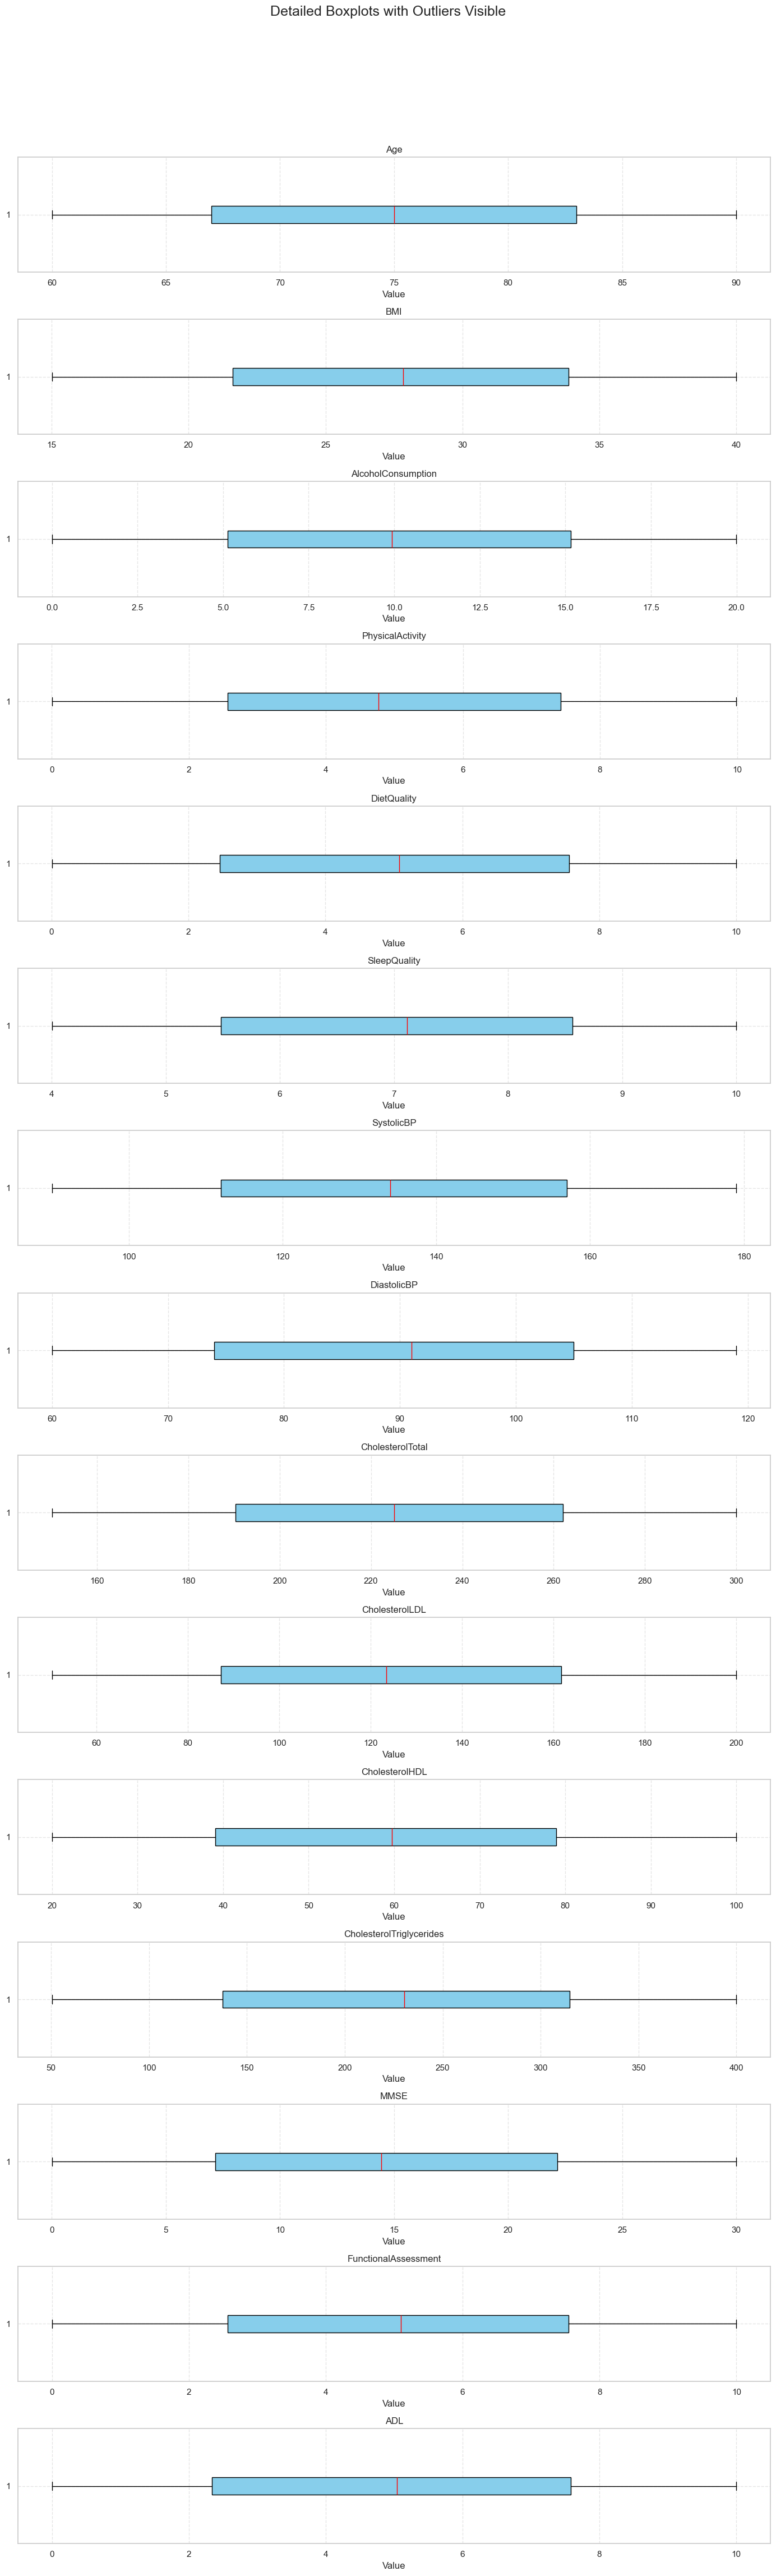

In [101]:
import matplotlib.pyplot as plt

# Select continuous numeric columns (ignore binary-like)
continuous_cols = [col for col in df_clean.select_dtypes(include='number').columns
                   if df_clean[col].nunique() > 5]

# Create a vertically stacked plot for each feature
n = len(continuous_cols)
fig, axes = plt.subplots(n, 1, figsize=(14, 3 * n), sharex=False)

for i, col in enumerate(continuous_cols):
    ax = axes[i] if n > 1 else axes
    
    # Plot with outliers shown using 'sym'
    ax.boxplot(df_clean[col],
               vert=False,
               patch_artist=True,
               whis=1.5,
               sym='o',  # Ensures outliers are marked
               boxprops=dict(facecolor='skyblue', color='black'),
               whiskerprops=dict(color='black'),
               capprops=dict(color='black'),
               medianprops=dict(color='red'),
               flierprops=dict(markerfacecolor='orange', marker='o', markersize=6, linestyle='none'))

    ax.set_title(col, fontsize=12)
    ax.set_xlabel('Value')
    ax.grid(True, linestyle='--', alpha=0.5)

    # Optional: add margin around extreme values to prevent clipping
    data_min, data_max = df_clean[col].min(), df_clean[col].max()
    margin = (data_max - data_min) * 0.05
    ax.set_xlim(data_min - margin, data_max + margin)

# Final layout
fig.suptitle('Detailed Boxplots with Outliers Visible', fontsize=18, y=1.02)
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()


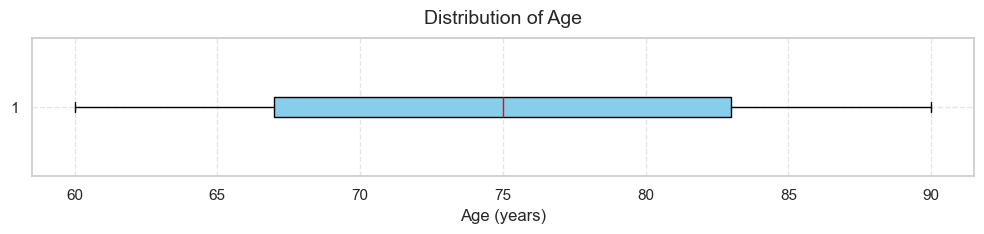

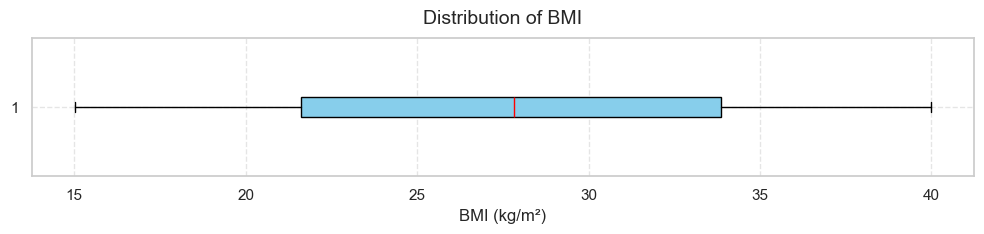

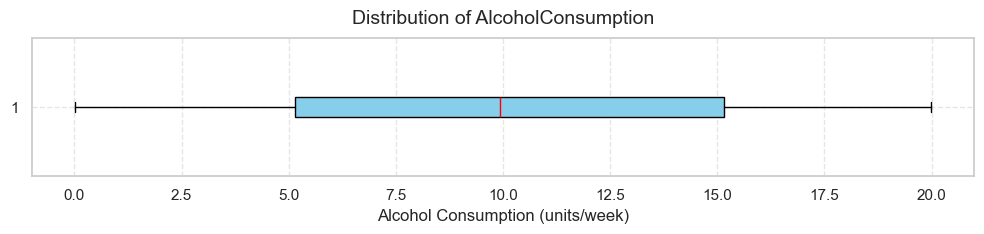

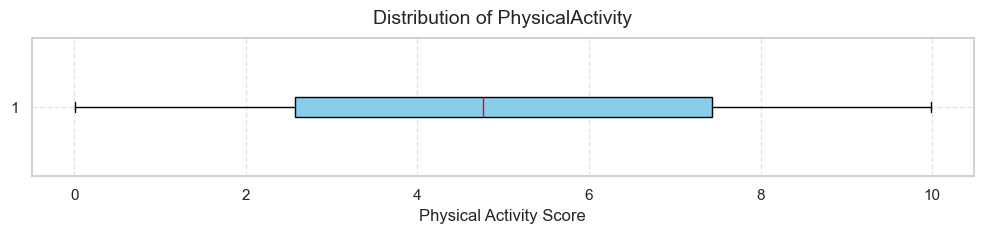

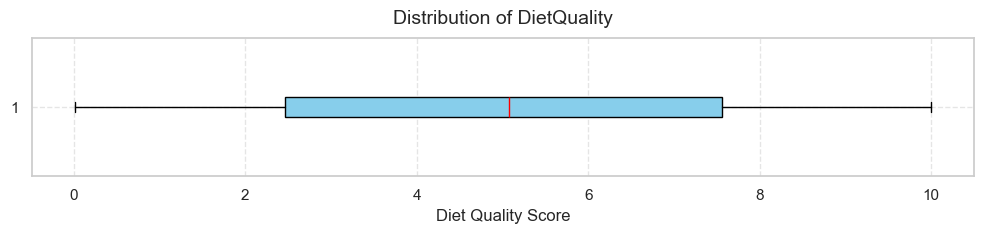

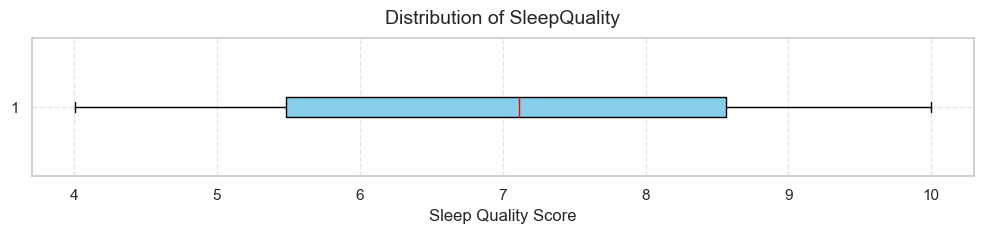

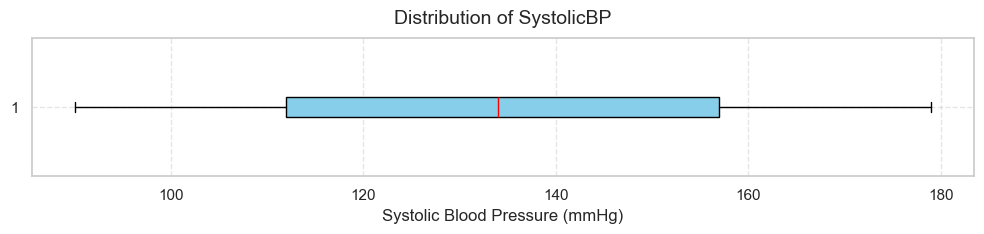

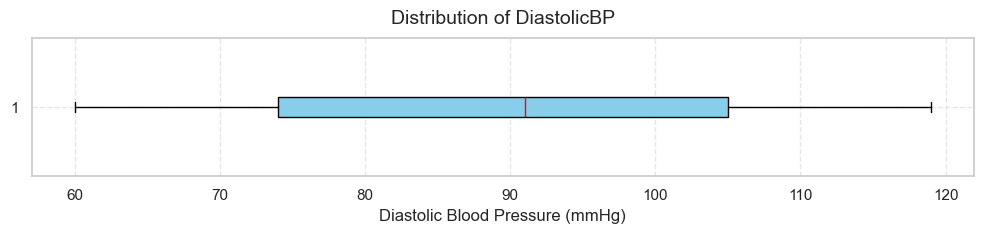

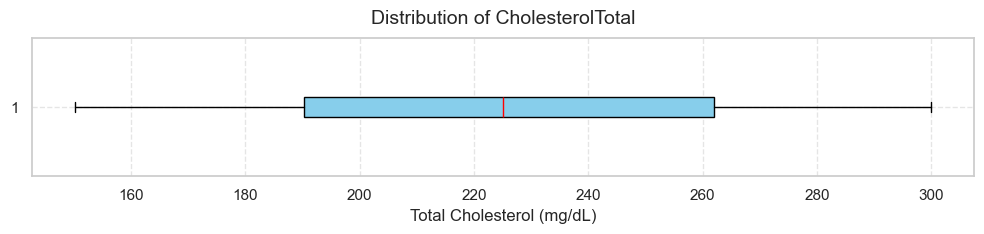

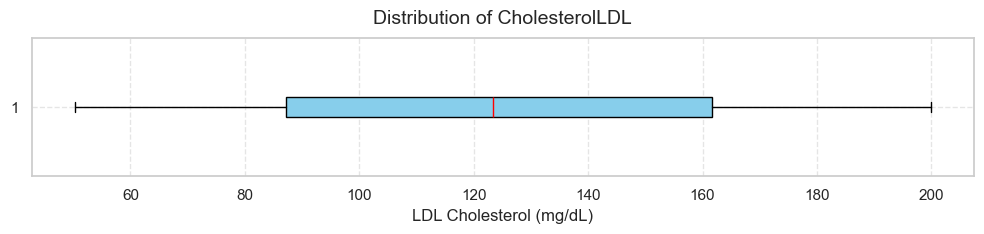

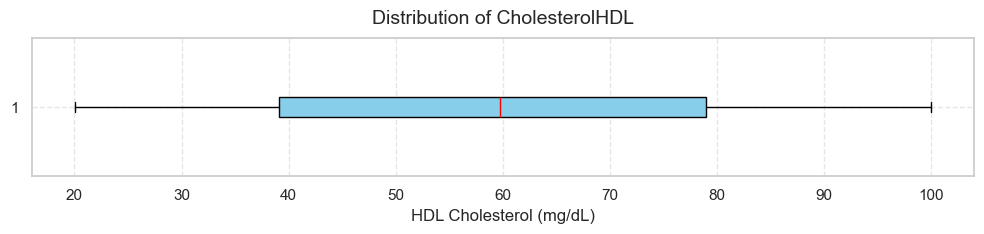

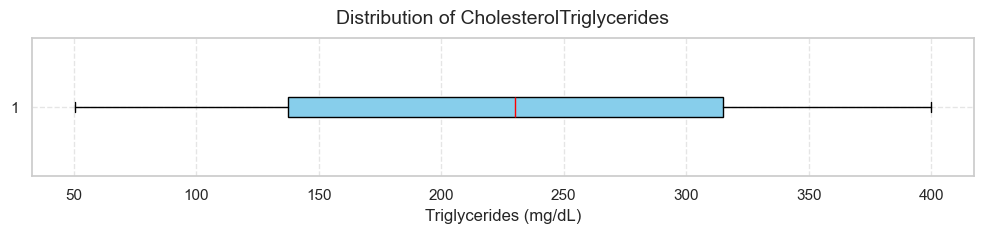

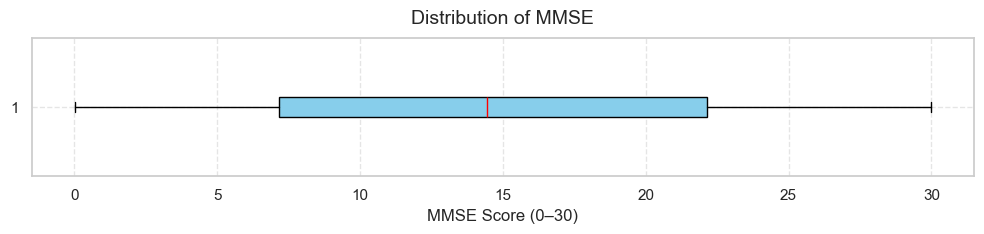

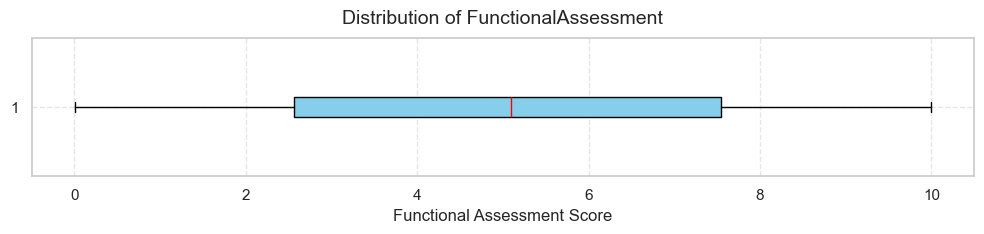

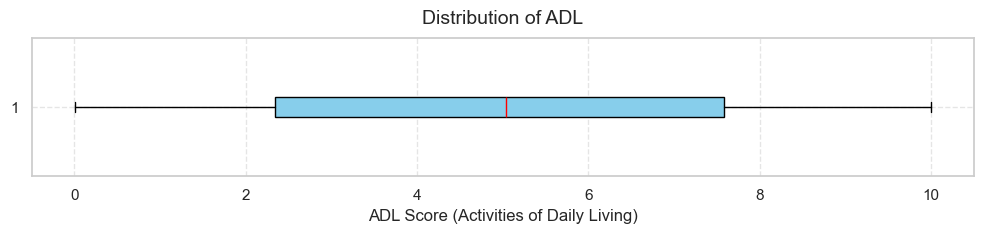

In [78]:
import matplotlib.pyplot as plt
import os

# Define custom labels with units or explanations
feature_labels = {
    'Age': 'Age (years)',
    'BMI': 'BMI (kg/m²)',
    'AlcoholConsumption': 'Alcohol Consumption (units/week)',
    'PhysicalActivity': 'Physical Activity Score',
    'DietQuality': 'Diet Quality Score',
    'SleepQuality': 'Sleep Quality Score',
    'SystolicBP': 'Systolic Blood Pressure (mmHg)',
    'DiastolicBP': 'Diastolic Blood Pressure (mmHg)',
    'CholesterolTotal': 'Total Cholesterol (mg/dL)',
    'CholesterolLDL': 'LDL Cholesterol (mg/dL)',
    'CholesterolHDL': 'HDL Cholesterol (mg/dL)',
    'CholesterolTriglycerides': 'Triglycerides (mg/dL)',
    'MMSE': 'MMSE Score (0–30)',
    'FunctionalAssessment': 'Functional Assessment Score',
    'ADL': 'ADL Score (Activities of Daily Living)',
}

# Create /plots directory
output_dir = "plots"
os.makedirs(output_dir, exist_ok=True)

# Select continuous numeric features
continuous_cols = [col for col in df_clean.select_dtypes(include='number').columns
                   if df_clean[col].nunique() > 5]

# Plot, label, save, and display
for col in continuous_cols:
    label = feature_labels.get(col, col)  # Default to column name if no custom label
    
    fig, ax = plt.subplots(figsize=(10, 2.5))
    ax.boxplot(df_clean[col], vert=False,
               patch_artist=True,
               boxprops=dict(facecolor='skyblue', color='black'),
               whiskerprops=dict(color='black'),
               capprops=dict(color='black'),
               medianprops=dict(color='red'),
               flierprops=dict(markerfacecolor='orange', marker='o', markersize=6))

    ax.set_title(f'Distribution of {col}', fontsize=14, pad=10)
    ax.set_xlabel(label, fontsize=12)
    ax.set_ylabel('') 
    ax.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.savefig(f"{output_dir}/boxplot_{col}.png")
    plt.show()
    plt.close(fig)

In [ ]:
#### Full Overview

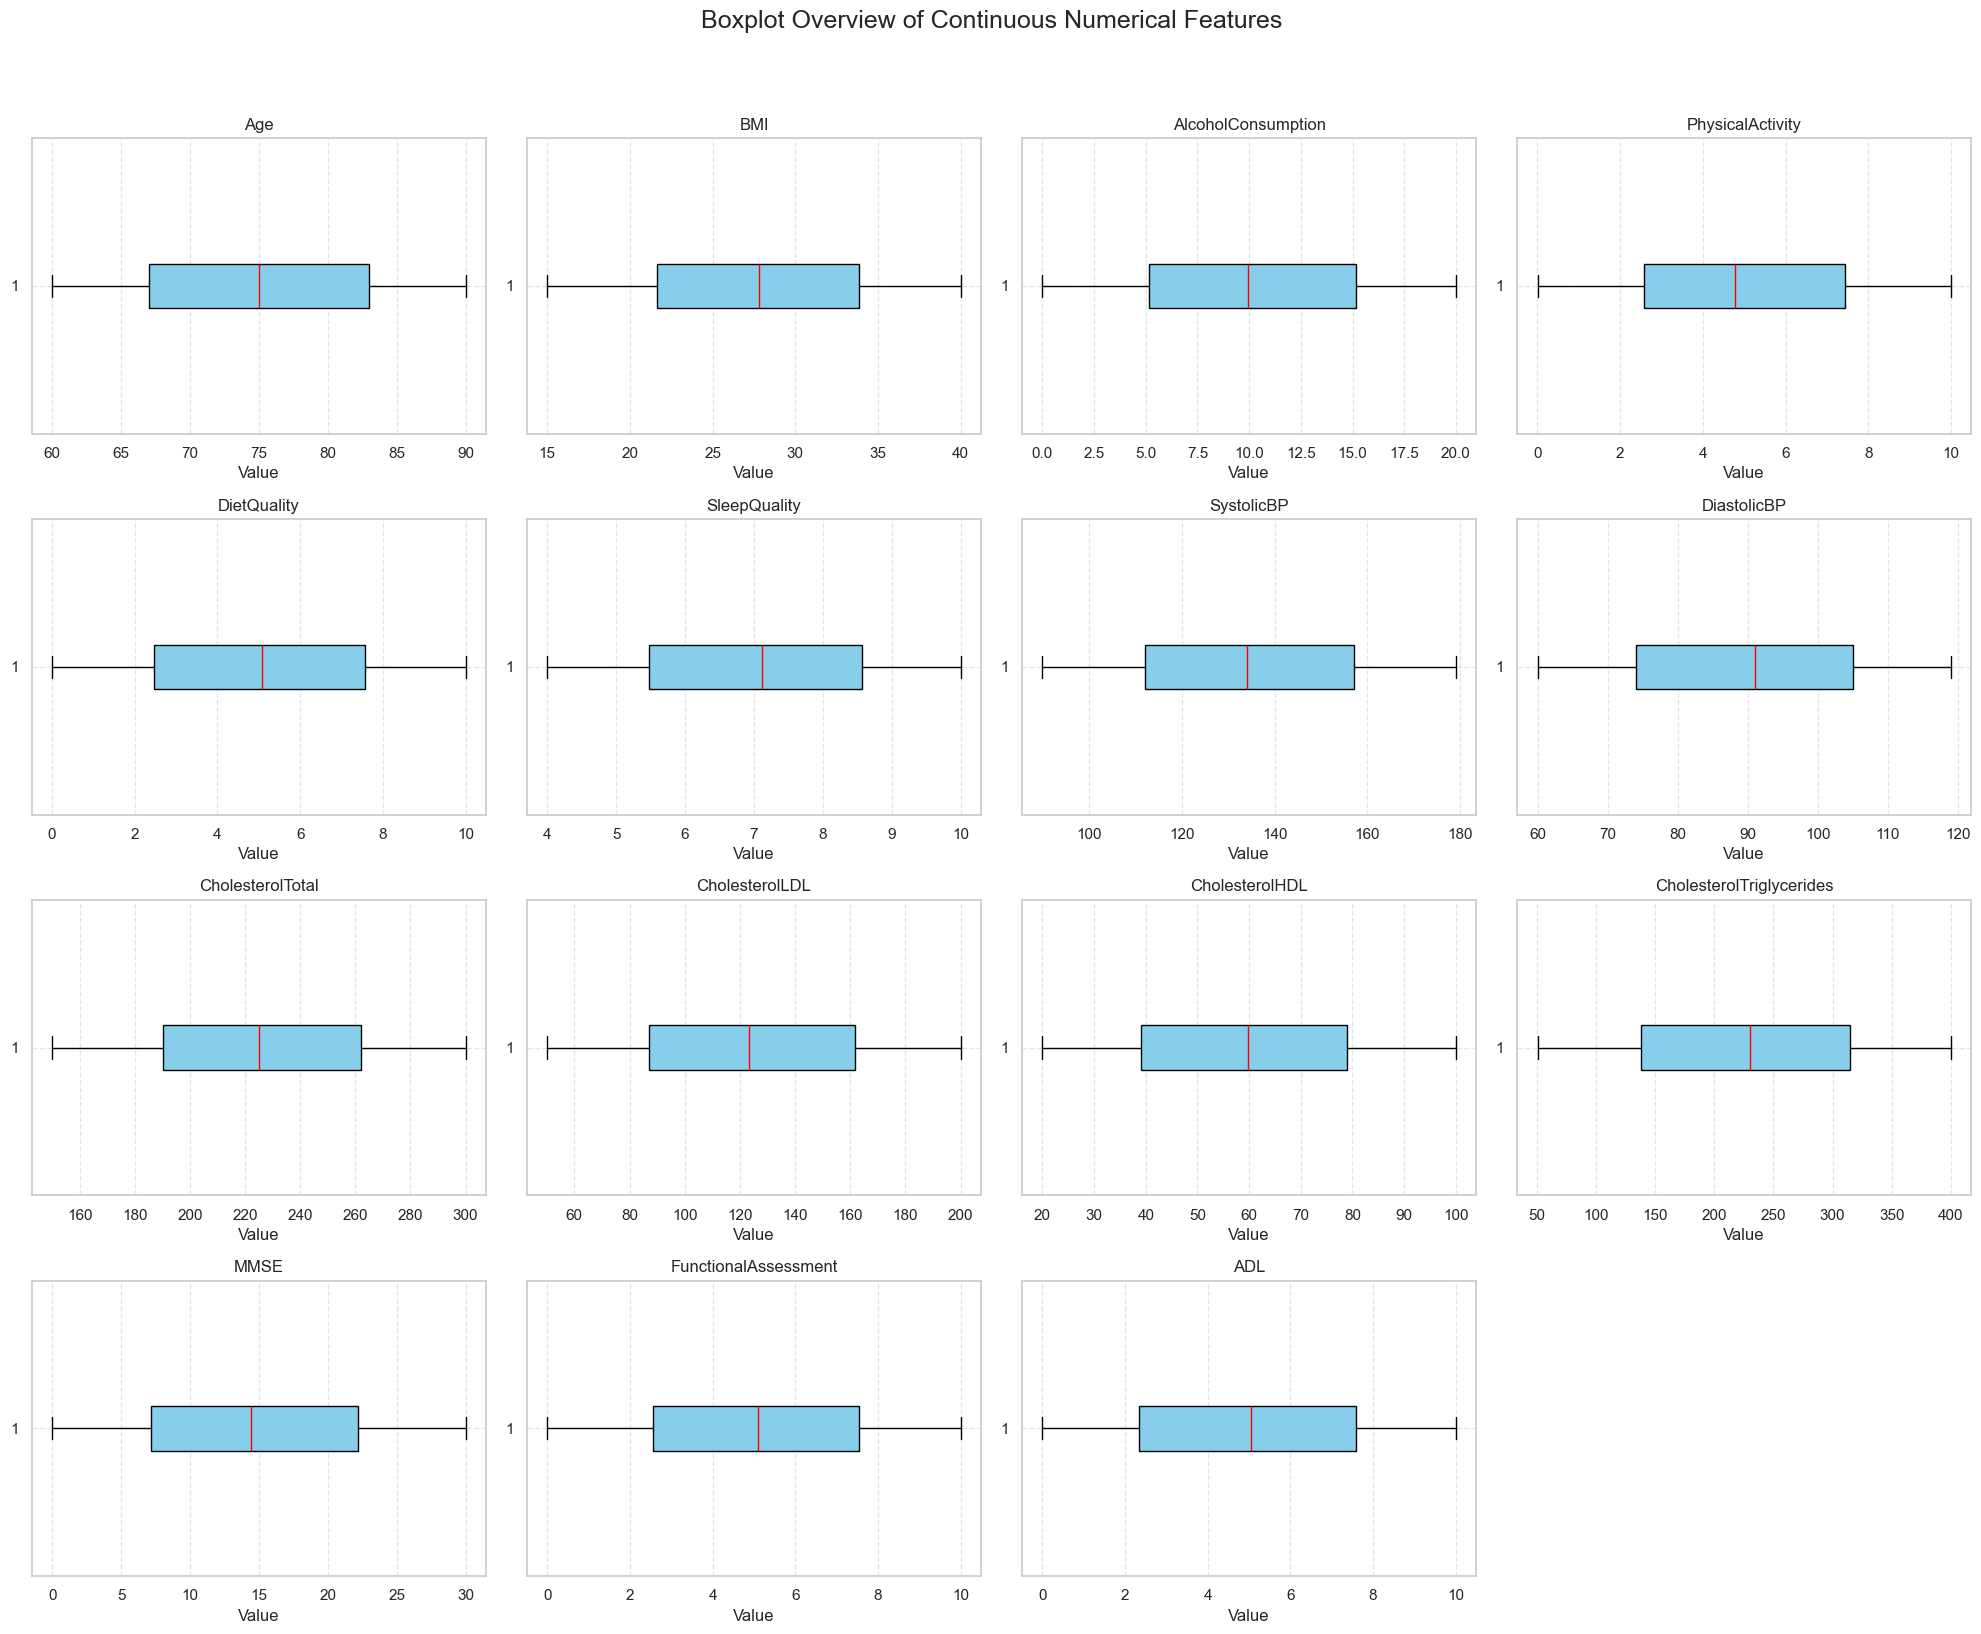

In [95]:
import matplotlib.pyplot as plt

# Step 1: Select only continuous numeric columns (more than 5 unique values)
continuous_cols = [col for col in df_clean.select_dtypes(include='number').columns
                   if df_clean[col].nunique() > 5]

# Step 2: Determine layout (e.g. 4 plots per row)
n_cols = 4
n_rows = (len(continuous_cols) + n_cols - 1) // n_cols

# Step 3: Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()  # Flatten for easier indexing

# Step 4: Plot each boxplot
for i, col in enumerate(continuous_cols):
    ax = axes[i]
    ax.boxplot(df_clean[col], vert=False,
               patch_artist=True,
               boxprops=dict(facecolor='skyblue', color='black'),
               whiskerprops=dict(color='black'),
               capprops=dict(color='black'),
               medianprops=dict(color='red'),
               flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none'))

    ax.set_title(f'{col}', fontsize=12)
    ax.set_xlabel('Value')
    ax.grid(True, linestyle='--', alpha=0.5)

# Step 5: Remove unused axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add global title and layout adjustments
fig.suptitle('Boxplot Overview of Continuous Numerical Features', fontsize=18, y=1.02)
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()


In [ ]:
### Output
During exploratory data analysis using the cleaned dataset, horizontal boxplots were used to examine the distributions of continuous features. This helped identify typical value ranges and detect outliers, which are important for understanding patient health patterns and preparing the data for modeling.

**BMI and Alcohol Consumption:**
Most individuals have a BMI between 20 and 35, which falls within a normal range. However, a few cases exceed 40, making them clear outliers. This is important because high BMI is linked to increased risk of Alzheimer’s disease. Alcohol consumption shows a similar trend:

- Most values fall below 12 units per week
- Some individuals exceed 18 or even 20 units, which marks them as outliers

**Sleep Quality and Lifestyle Indicators:**
Sleep quality appears to be fairly well distributed, with most scores between 6 and 9. One individual has a score below 5, which stands out. This may be a sign of poor health rather than a data issue.

- Physical activity and diet quality scores are generally in a healthy range
- A few low values exist and may represent unhealthy lifestyle habits

**Blood Pressure and Cholesterol Levels:**
Systolic blood pressure mostly ranges between 110 and 160 mmHg, with a few cases close to 180 mmHg. Diastolic blood pressure follows a similar pattern, with most values around 80 to 100 mmHg, but some extend to 120 mmHg. Cholesterol values show more noticeable outliers:

- Total cholesterol in some cases exceeds 260 mg/dL
- LDL cholesterol and triglycerides can reach levels between 200 and 400 mg/dL

**Cognitive and Functional Assessments:**
MMSE scores (ranging from 0 to 30) show a wide distribution. Some patients have low scores indicating cognitive impairment. ADL and Functional Assessment scores mostly fall between 2 and 8, with a few lower-functioning outliers.

In [ ]:
---------------------------------

In [ ]:
## Plot Histograms for Numeric Features

In [ ]:
Below is some code we use to create a histogram for each numeric column in the dataset. It also adds a smooth curve (called KDE) to show the overall shape of the data. Each plot is saved so we can use it later, for example in our Streamlit dashboard. By looking at these plots, we can spot possible outliers, identify skewed features, and get a better sense of how the values are spread. This will help us decide whether we need to transform or scale the data before training machine learning models.

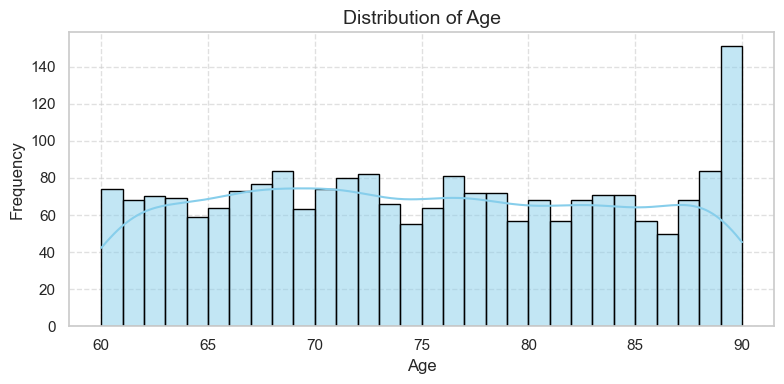

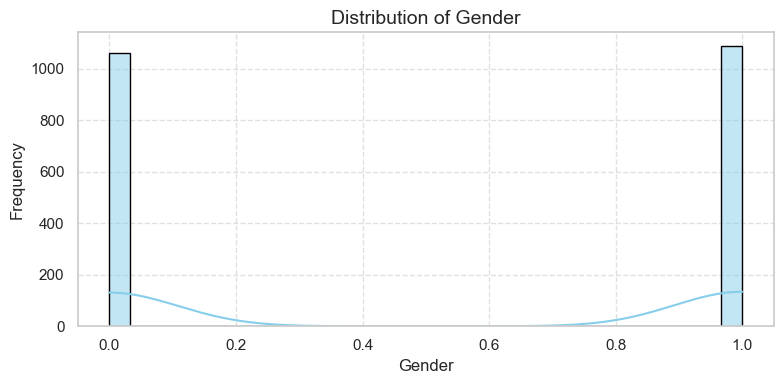

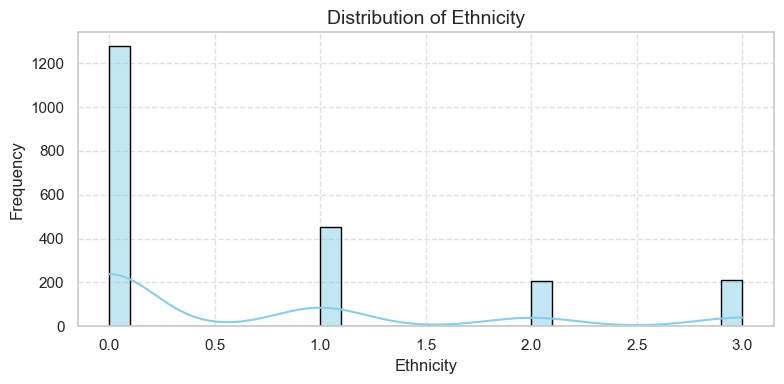

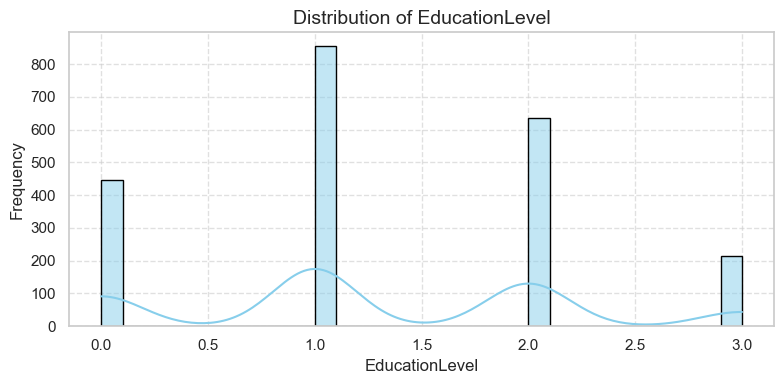

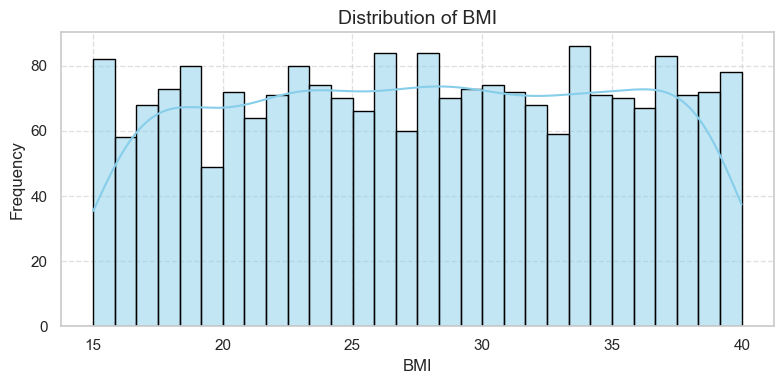

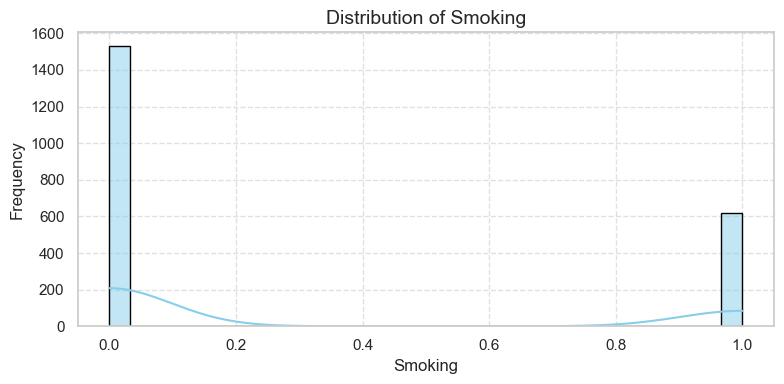

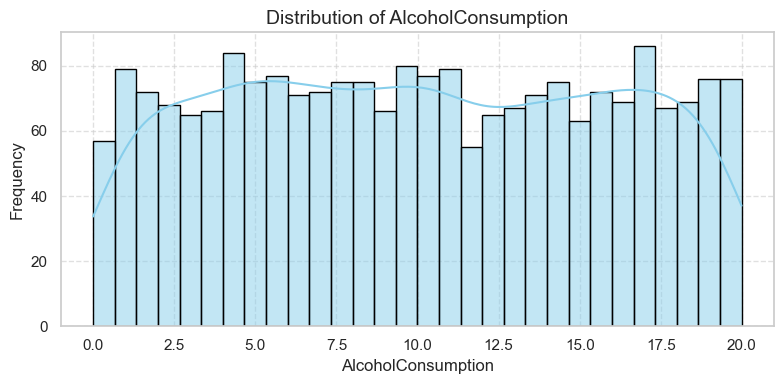

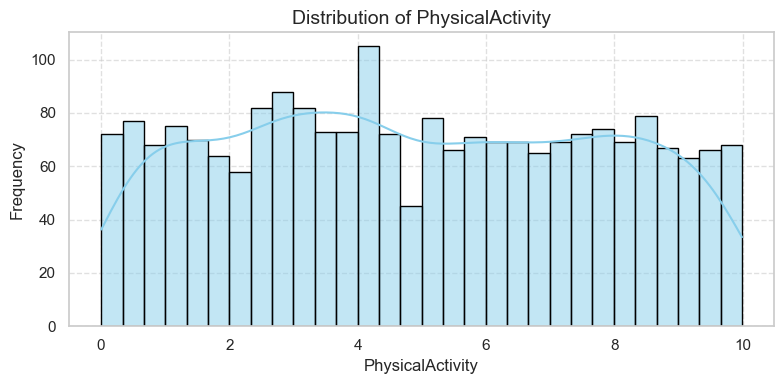

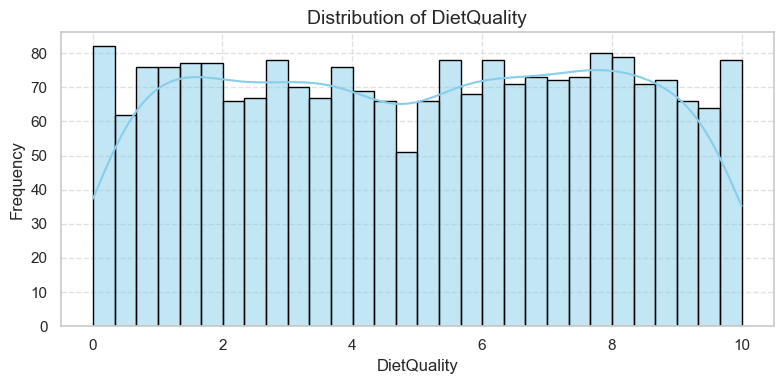

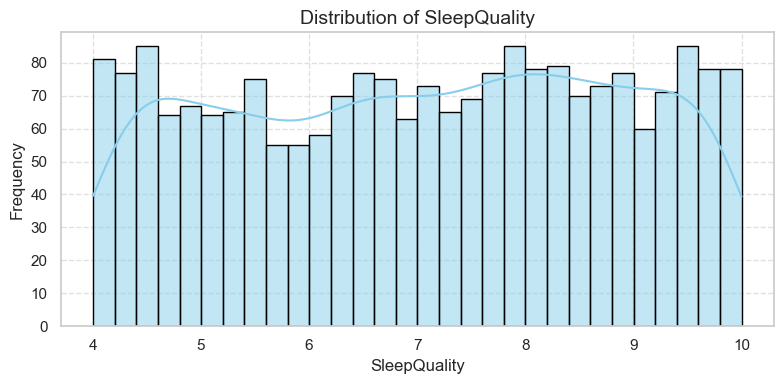

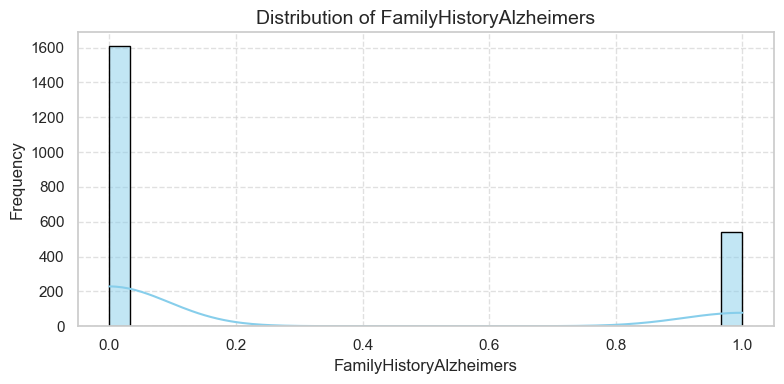

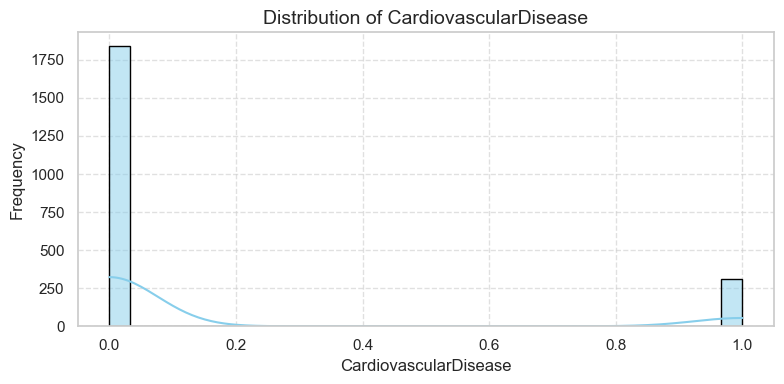

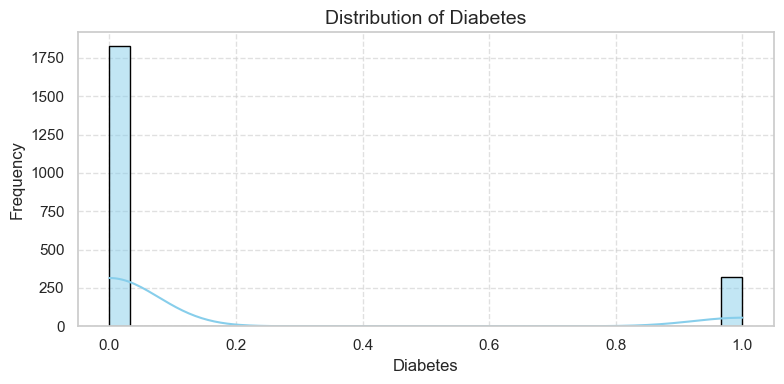

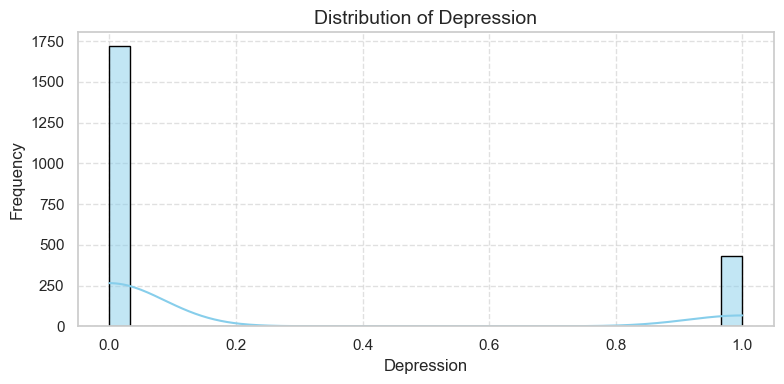

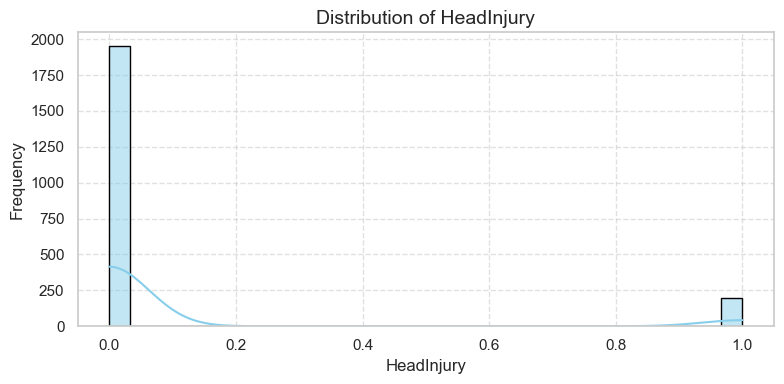

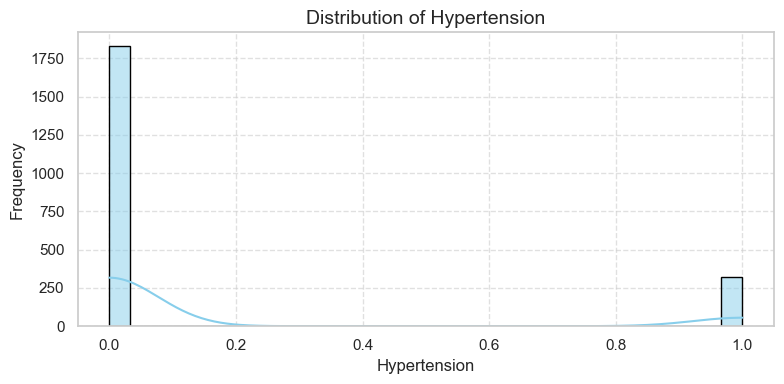

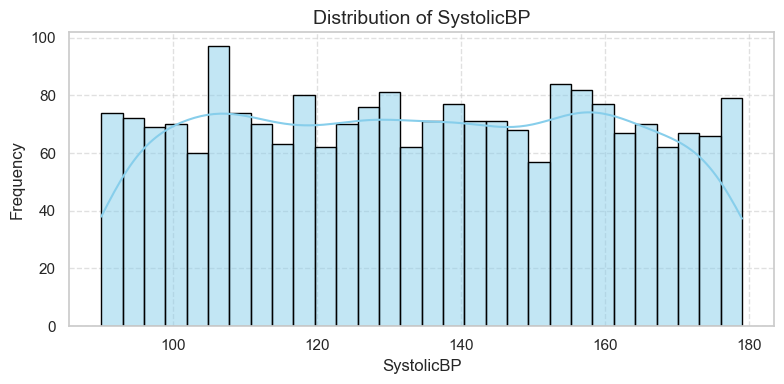

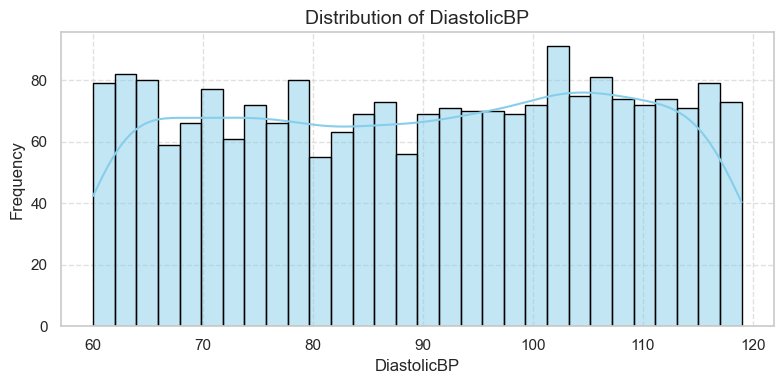

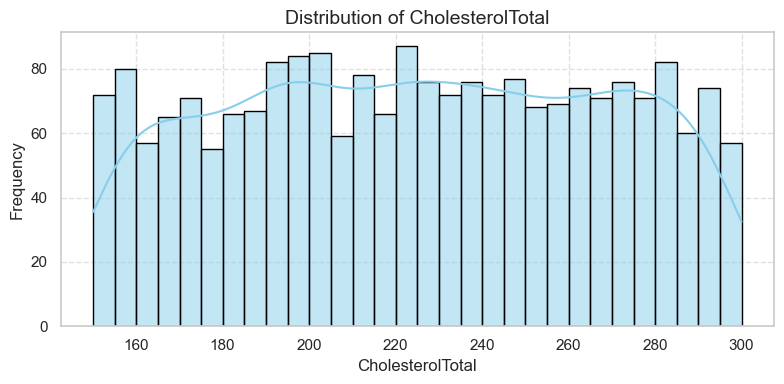

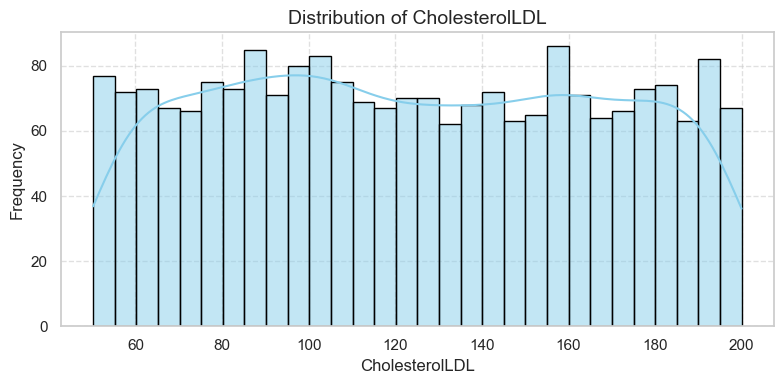

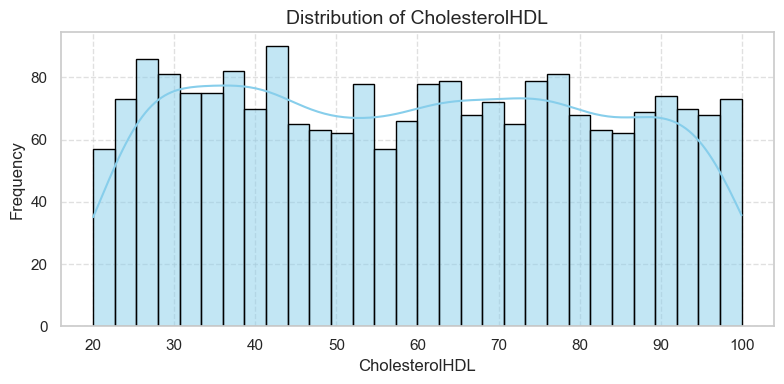

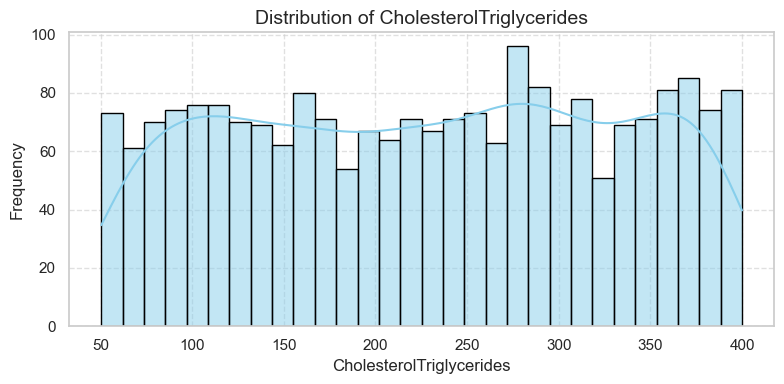

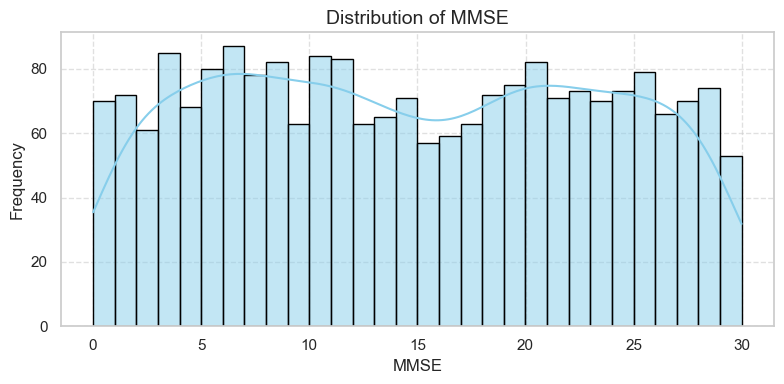

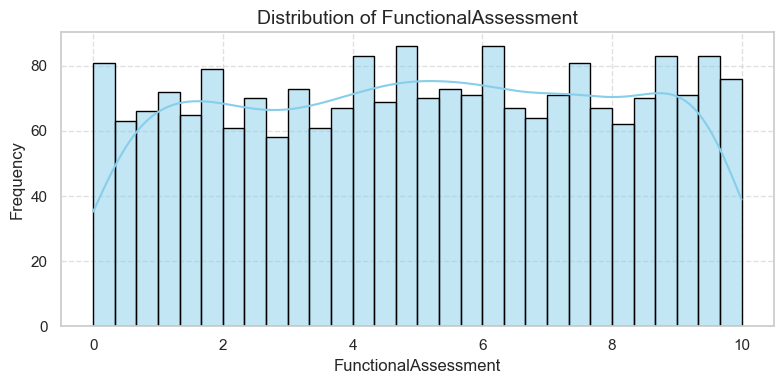

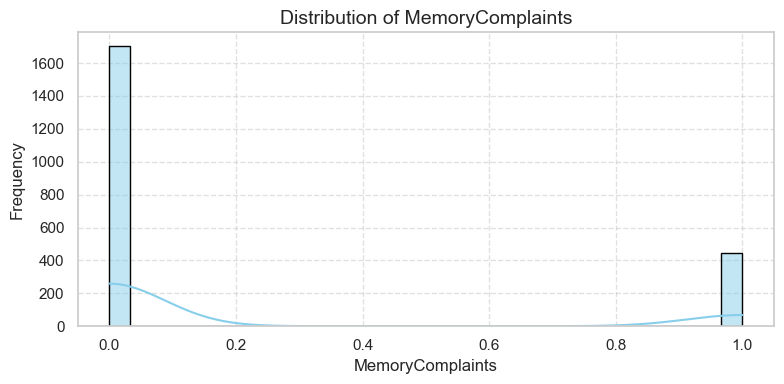

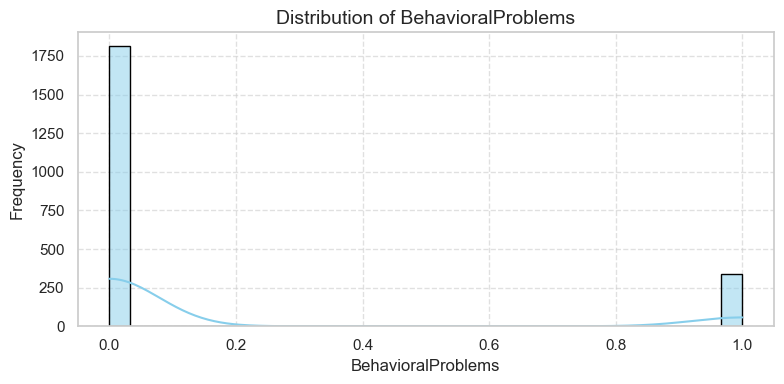

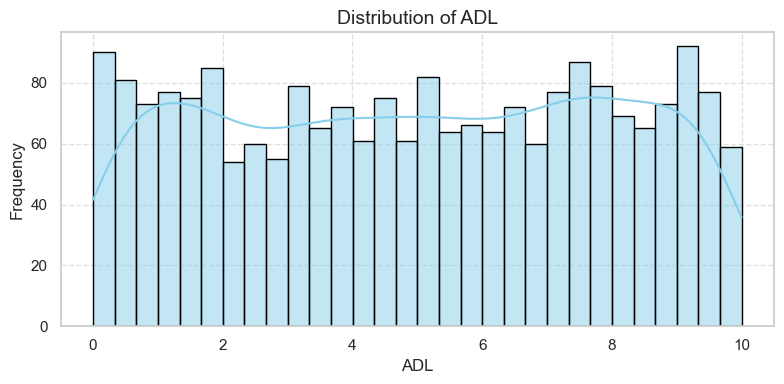

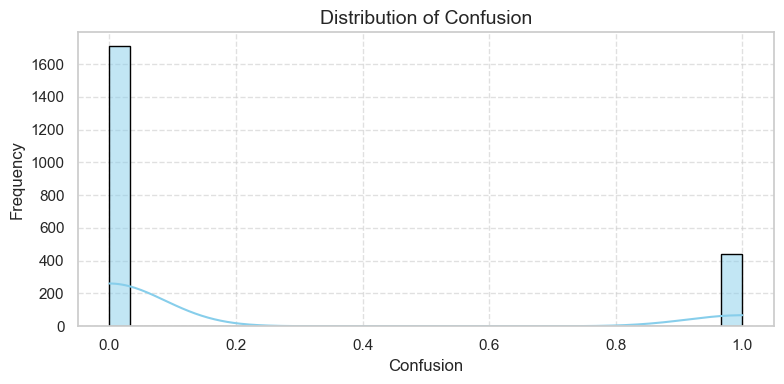

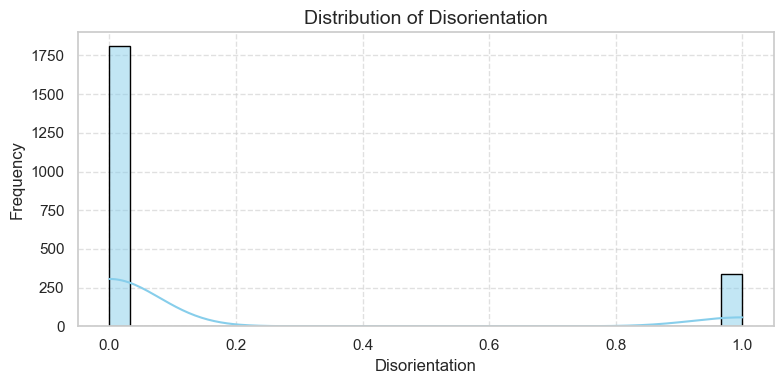

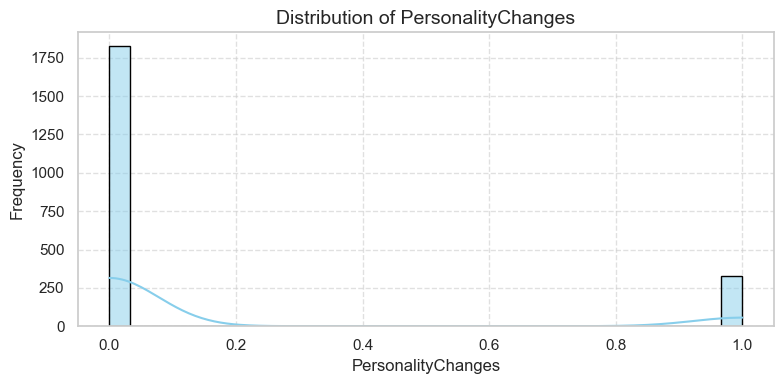

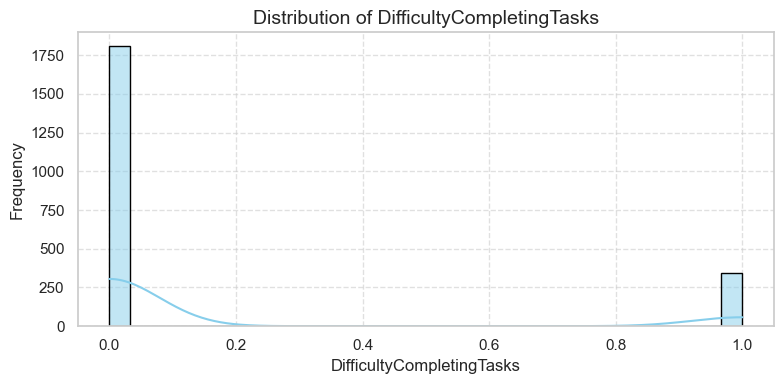

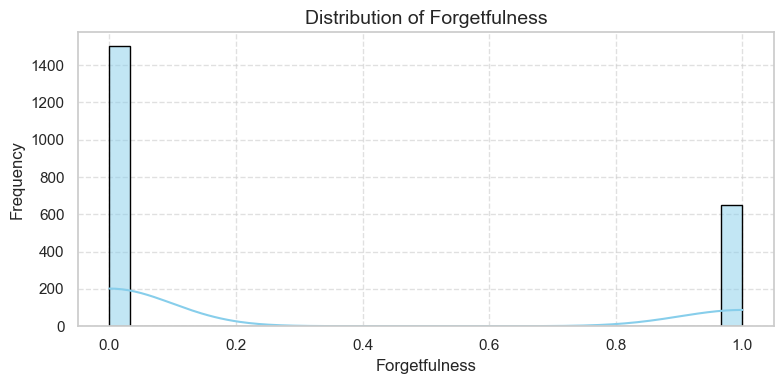

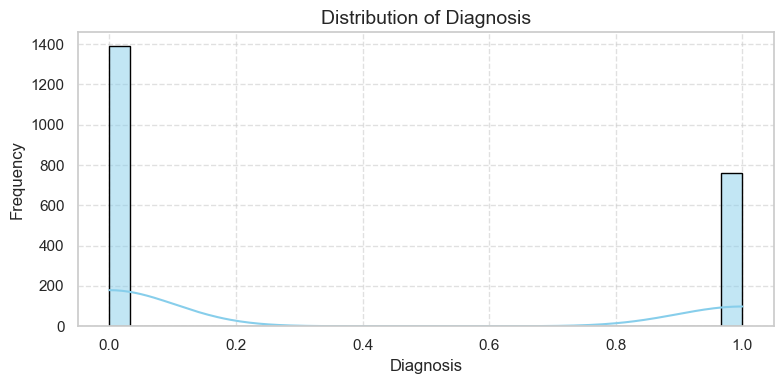

In [87]:
# Get all numeric columns
numeric_cols = df_clean.select_dtypes(include=np.number).columns.tolist()

# Plot and save individual histograms
for col in numeric_cols:
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.histplot(df_clean[col], kde=True, bins=30, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f"Distribution of {col}", fontsize=14)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.grid(True, linestyle='--', alpha=0.6)

    # Save and show
    plt.tight_layout()
    plt.savefig(f"plots/hist_{col}.png")
    plt.show()
    plt.close(fig)

In [ ]:
#### Full overview of histograms

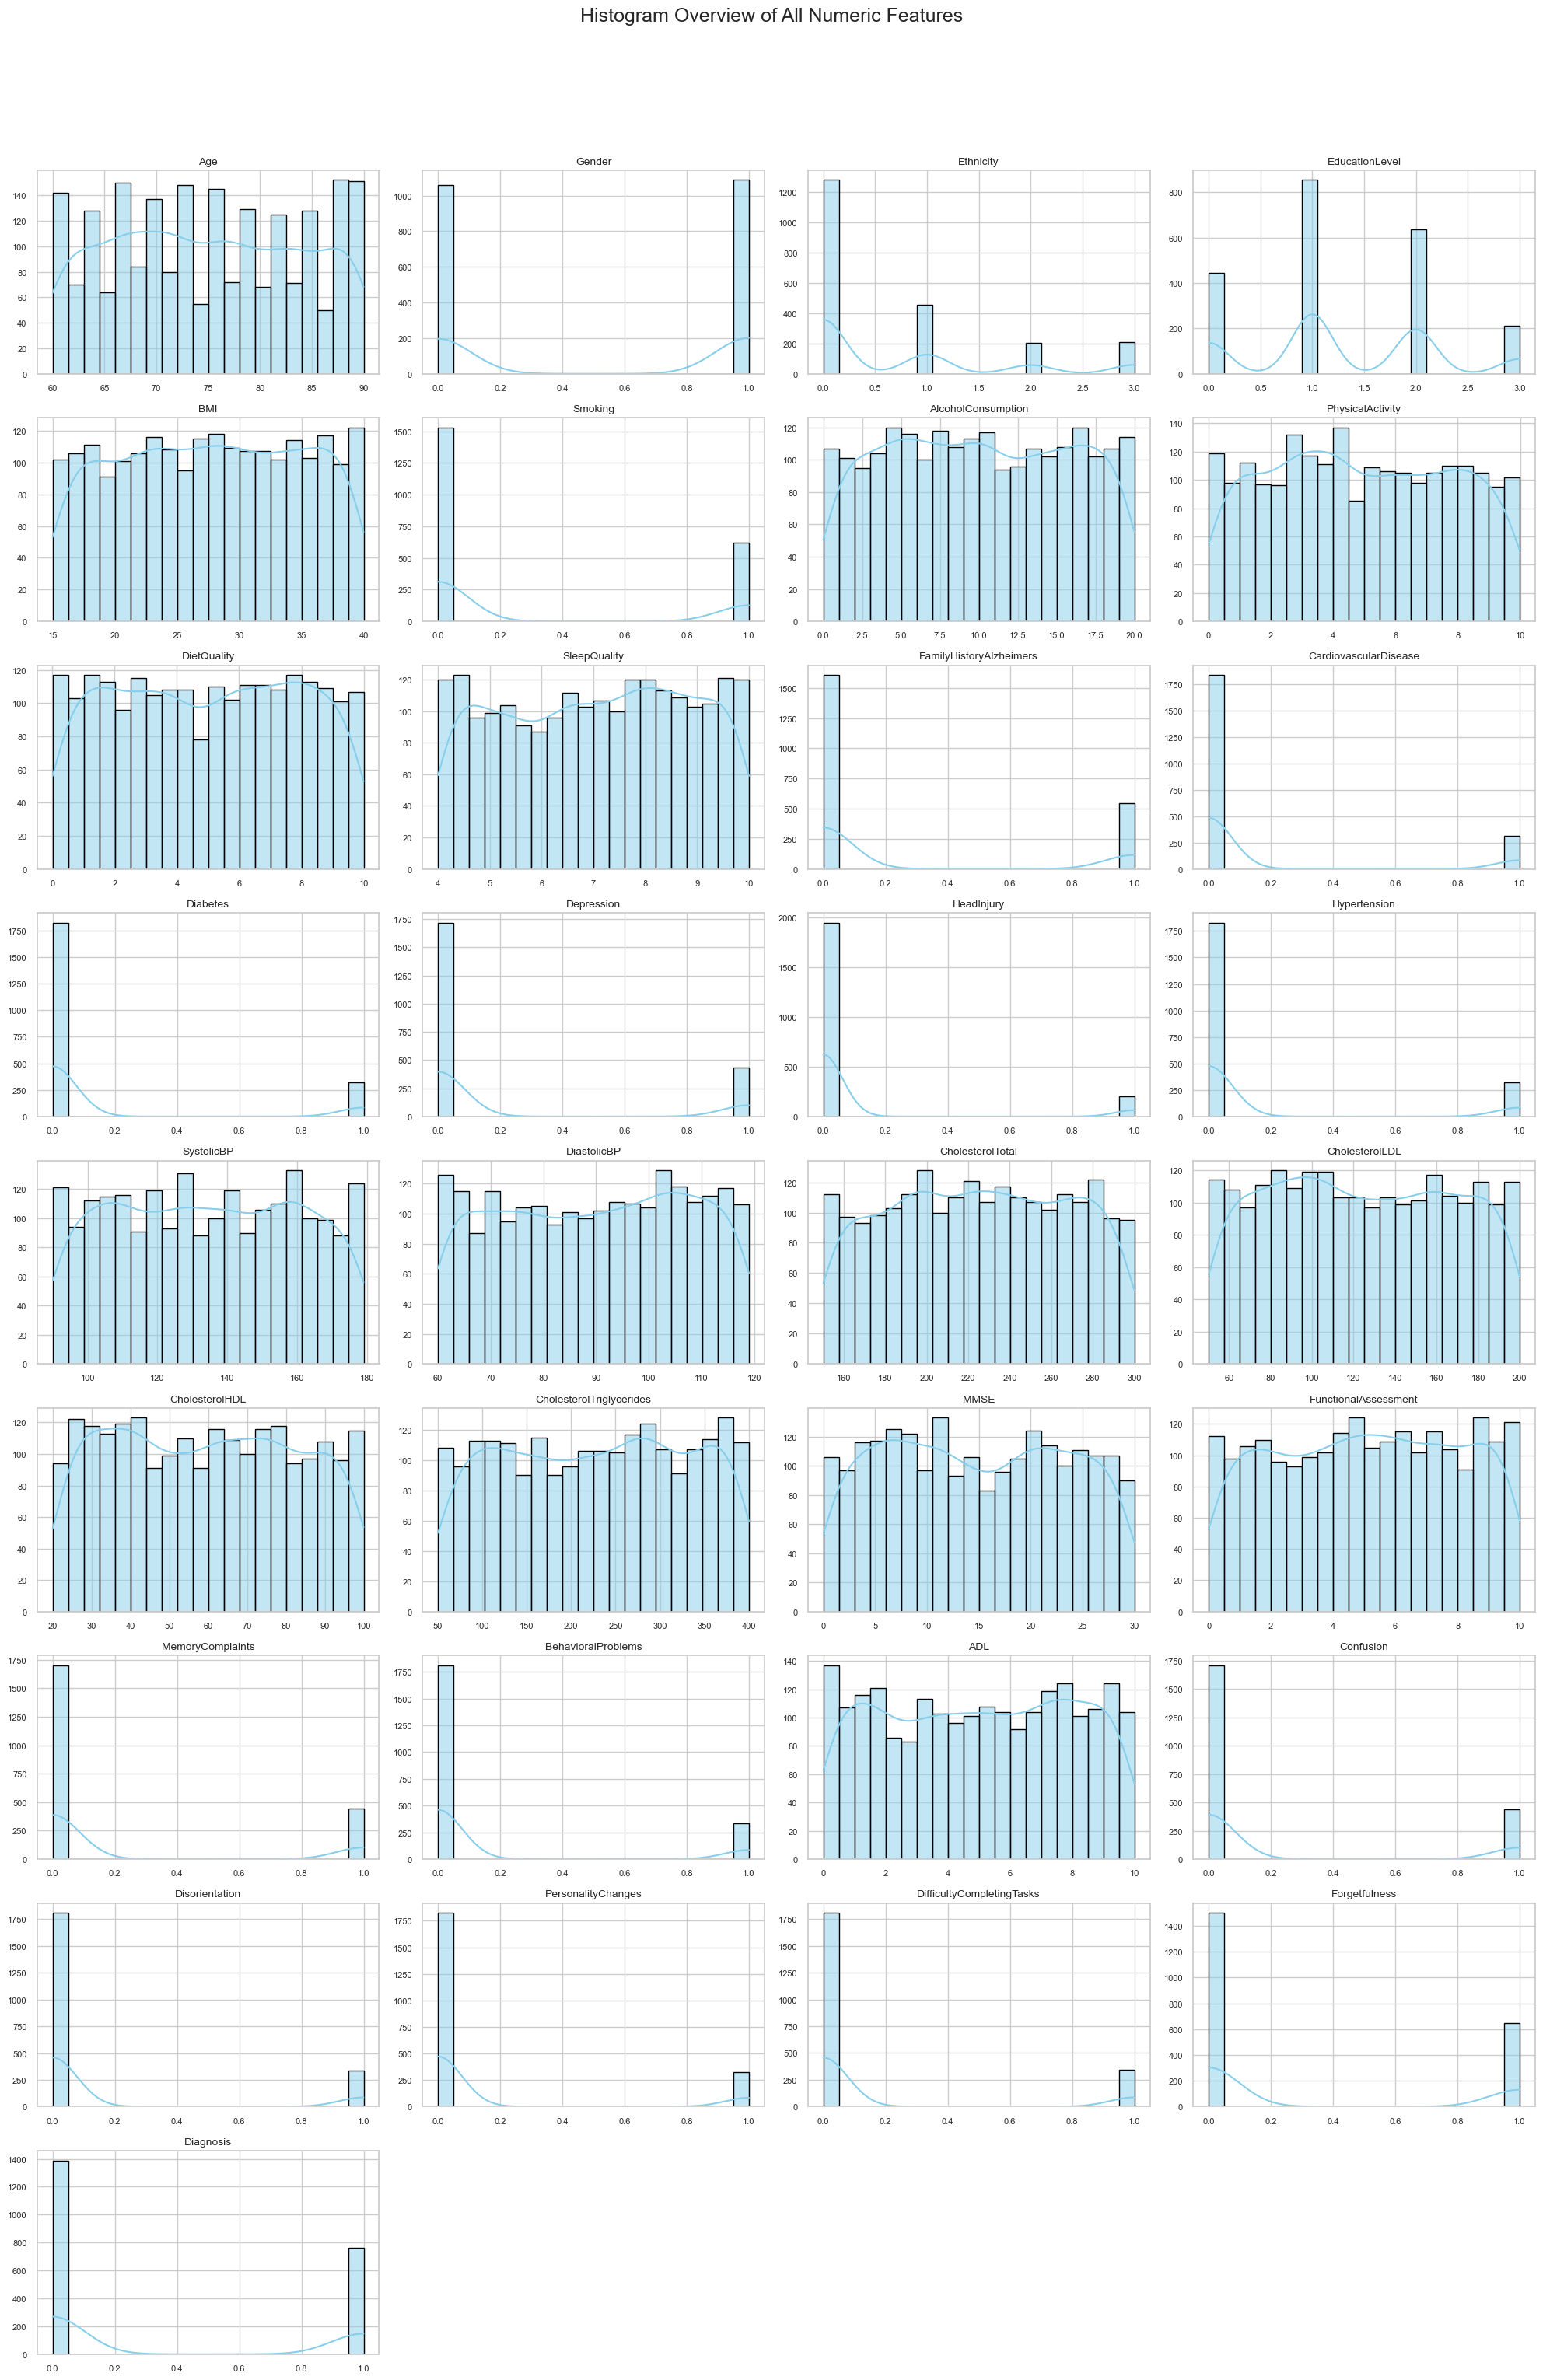

In [92]:
plt.figure(figsize=(20, 30))
for i, col in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols) + 3) // 4, 4, i + 1)
    sns.histplot(df_clean[col], kde=True, bins=20, color='skyblue', edgecolor='black')
    plt.title(col, fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.suptitle("Histogram Overview of All Numeric Features", fontsize=18, y=1.02)
plt.subplots_adjust(top=0.95)
plt.show()

In [ ]:
### Output
The histograms show how each feature in the cleaned dataset is distributed. This helps us spot patterns before we build any machine learning models. We can see whether values are evenly spread, skewed, or clustered. This is useful for choosing features, applying transformations, and understanding how different variables relate to Alzheimer’s risk. We also connect what we observe to our project’s hypotheses.

#### Demographics
- **Age** shows a bell-shaped curve, centered around the mid-70s. This supports Hypothesis H1: older age is linked to higher Alzheimer’s risk. The wide age range helps us compare risk by age group.
- **Gender** is nearly evenly split between male and female. This balance is good for avoiding gender bias in the model.
- **Ethnicity** has most values concentrated in one group, but there are still enough cases in other categories to make group comparisons.
- **EducationLevel** is focused on levels 1 and 2 (high school and bachelor’s). This might relate to cognitive reserve, helping us understand how education affects diagnosis.


#### Lifestyle
- **BMI** is roughly normal, with most patients in the healthy or slightly overweight range. There are no extreme outliers, so it's ready for use in modeling.
- **PhysicalActivity**, **DietQuality**, and **SleepQuality** are skewed toward higher scores, meaning most patients report healthy routines. This will help us test Hypothesis H3: better habits might lower risk.
- **Smoking** and **AlcoholConsumption** both show spikes at low values (0 or 1). Most people don’t smoke or drink much, but there’s still enough variation for comparisons.

#### Medical History
- Binary features like **Hypertension**, **Diabetes**, **Depression**, **HeadInjury**, and **FamilyHistoryAlzheimers** mostly show 0 values, but we still have enough 1s to study their effect.
- These conditions are important because they may increase Alzheimer’s risk, even if they don’t appear in every patient.

#### Clinical Values
- **SystolicBP** and **DiastolicBP** have smooth, bell-shaped distributions. This means the data is clean, and no scaling or transformation is needed right now.
- **CholesterolTotal**, **HDL**, **LDL**, and **Triglycerides** also look well distributed and fall into expected medical ranges. These might have indirect effects on brain health.

#### Cognitive and Functional Assessments
- **MMSE** (Mini-Mental State Exam) has a wide range from 0 to 30, but most values are near the top. This matches Hypothesis H2: lower MMSE scores may point to Alzheimer’s.
- **FunctionalAssessment** and **ADL** (Activities of Daily Living) show that some patients struggle more than others with daily tasks. This adds useful context when evaluating cognitive decline.

#### Symptoms and Behavior
- Features like **Confusion**, **Disorientation**, **PersonalityChanges**, **DifficultyCompletingTasks**, and **Forgetfulness** are mostly 0, but there are enough 1s to help detect early warning signs.
- These symptoms may appear before major cognitive test scores drop, so they could help with early detection.

#### Target
- The **Diagnosis** column shows that about 64% of patients do not have Alzheimer’s, while 36% do.
- This slight imbalance is something we’ll need to consider when training models. We can use stratified sampling or evaluation metrics that adjust for imbalance.

### Summary
- Most numeric features have smooth or slightly skewed distributions — this means the data is well-behaved and ready to use.
- Binary features clearly separate 0s and 1s, which helps us understand presence or absence of symptoms or conditions.
- These histograms help us decide if any features need scaling or transformation before training.
- What we observe supports all three project hypotheses:
  - **H1**: Older patients show a higher rate of Alzheimer’s diagnosis.
  - **H2**: Lower MMSE and functional scores are linked to diagnosis.
  - **H3**: Healthier lifestyle habits could help reduce risk.

In [ ]:
-------------------------

In [ ]:
### Output

This combined boxplot includes all numeric features in one figure, but it is difficult to interpret because the features are on very different scales. For example, some values like cholesterol or blood pressure go well above 100, while others — like binary features (0 or 1) — have much smaller ranges.

As a result, many of the boxes appear squished or hard to see. This makes it difficult to compare the spread or detect outliers for most variables.

This shows that plotting all numeric features together is not very helpful when the value ranges are so different. To get more useful insights, it is better to create separate boxplots for individual features or for groups of features with similar scales.


In [ ]:
## Boxplots – Selected Continuous Features

To make the boxplots easier to read, we selected only a few continuous features that are measured on similar scales. This helps us better understand how the values are spread out, where the medians fall, and whether any outliers are present.

We focused on variables like BMI, PhysicalActivity, DietQuality, and several cholesterol-related features. These are all numeric, continuous, and relevant to our project goals — especially for testing Hypothesis 3 about the impact of lifestyle and health on Alzheimer’s risk.

By limiting the plot to these features, we get a clearer and more meaningful visualization that allows us to compare values across patients more effectively.

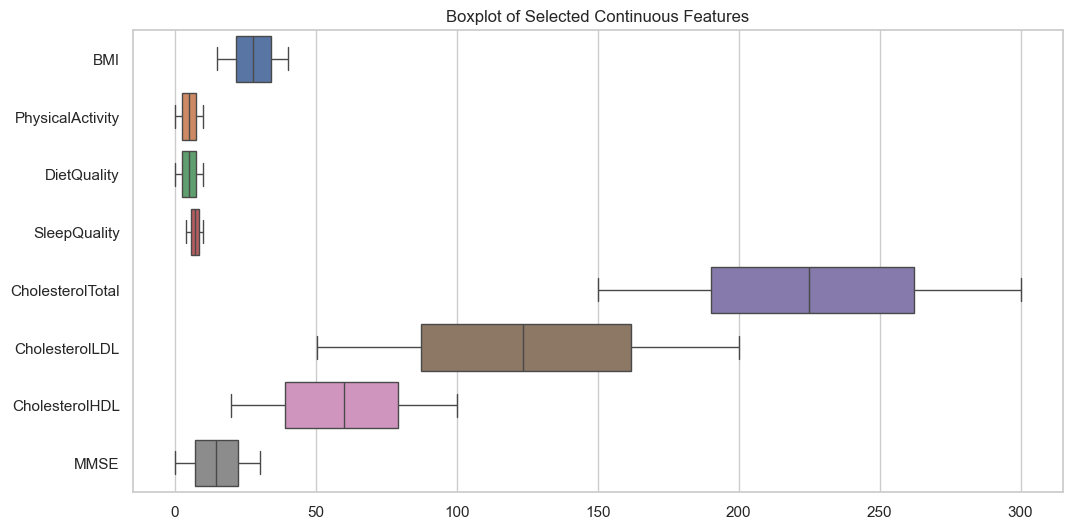

In [50]:
# Select continuous numeric columns for clearer boxplots
columns_to_plot = [
    "BMI", "PhysicalActivity", "DietQuality", "SleepQuality",
    "CholesterolTotal", "CholesterolLDL", "CholesterolHDL", "MMSE"
]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean[columns_to_plot], orient="h")
plt.title("Boxplot of Selected Continuous Features")
plt.show()

In [ ]:
### Output

These boxplots give us a much clearer and more balanced view of how the selected continuous features are spread out. After applying the log transformation, the differences between low and high values are easier to compare, and extreme values no longer stretch the scale as much.

We can now more clearly see the middle 50% of values (the box), the overall range, and any potential outliers for each variable. Features like CholesterolLDL and MMSE still show wider variation across patients, while others — such as PhysicalActivity, DietQuality, and SleepQuality — are more concentrated in a smaller range.

This transformation helps us better compare features side by side, even if they originally had very different scales. It also prepares these features for modeling, especially if we plan to use algorithms that are sensitive to skewed data or large value differences.


In [ ]:
## Boxplots – Log-Transformed Features

To make the boxplots even easier to read, we applied a log transformation to the selected features. This is useful when some values are much larger than others, which can make the plots harder to compare.

The log transformation helps by compressing higher values and spreading out lower values. This reduces skew in the data and allows us to better see patterns across features that originally had different scales.

We used the formula log(1 + x), which is a common approach that also works for values close to zero. This makes it safe and effective for visualizing medical and lifestyle data.

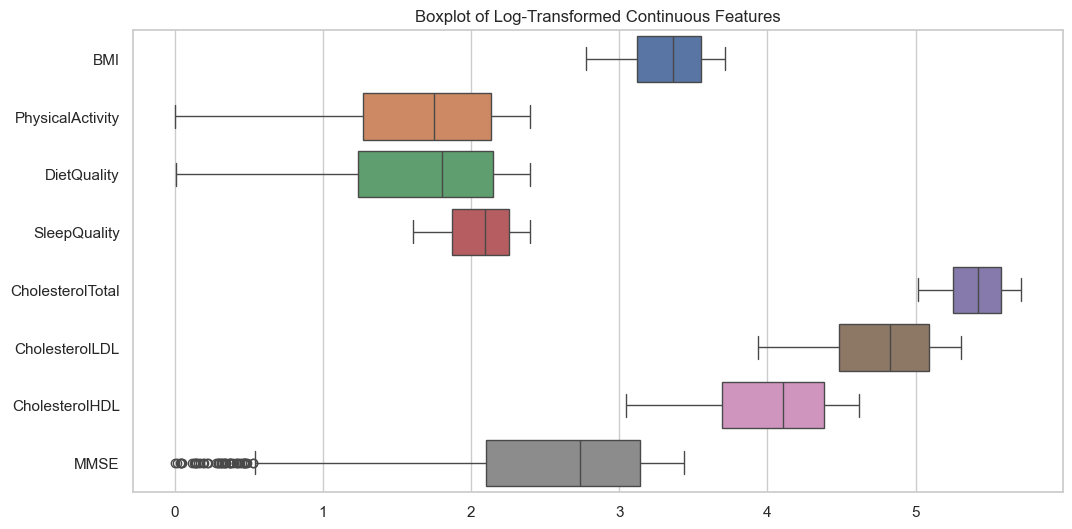

In [54]:
# Apply log transform to reduce skew before plotting
import numpy as np

df_log = df_clean[columns_to_plot].apply(lambda x: np.log1p(x))  # log(1 + x)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_log, orient="h")
plt.title("Boxplot of Log-Transformed Continuous Features")
plt.show()

In [ ]:
### Output

The log-transformed boxplots give us a more balanced and readable view of the continuous features. By compressing larger values and stretching smaller ones, the transformation helps reduce skew and makes patterns in the data easier to see.

We can now compare features more fairly on a similar scale. For example, MMSE originally had a wide spread and looked uneven, but after transformation, we can clearly see the distribution and any outliers. The same improvement is noticeable for cholesterol features like CholesterolTotal and CholesterolLDL.

This confirms that log transformation is a useful tool for handling skewed data. It not only improves visualization but also helps prepare features for machine learning models that are sensitive to value ranges or non-normal distributions.

In [ ]:
## Boxplots grouped by diagnosis

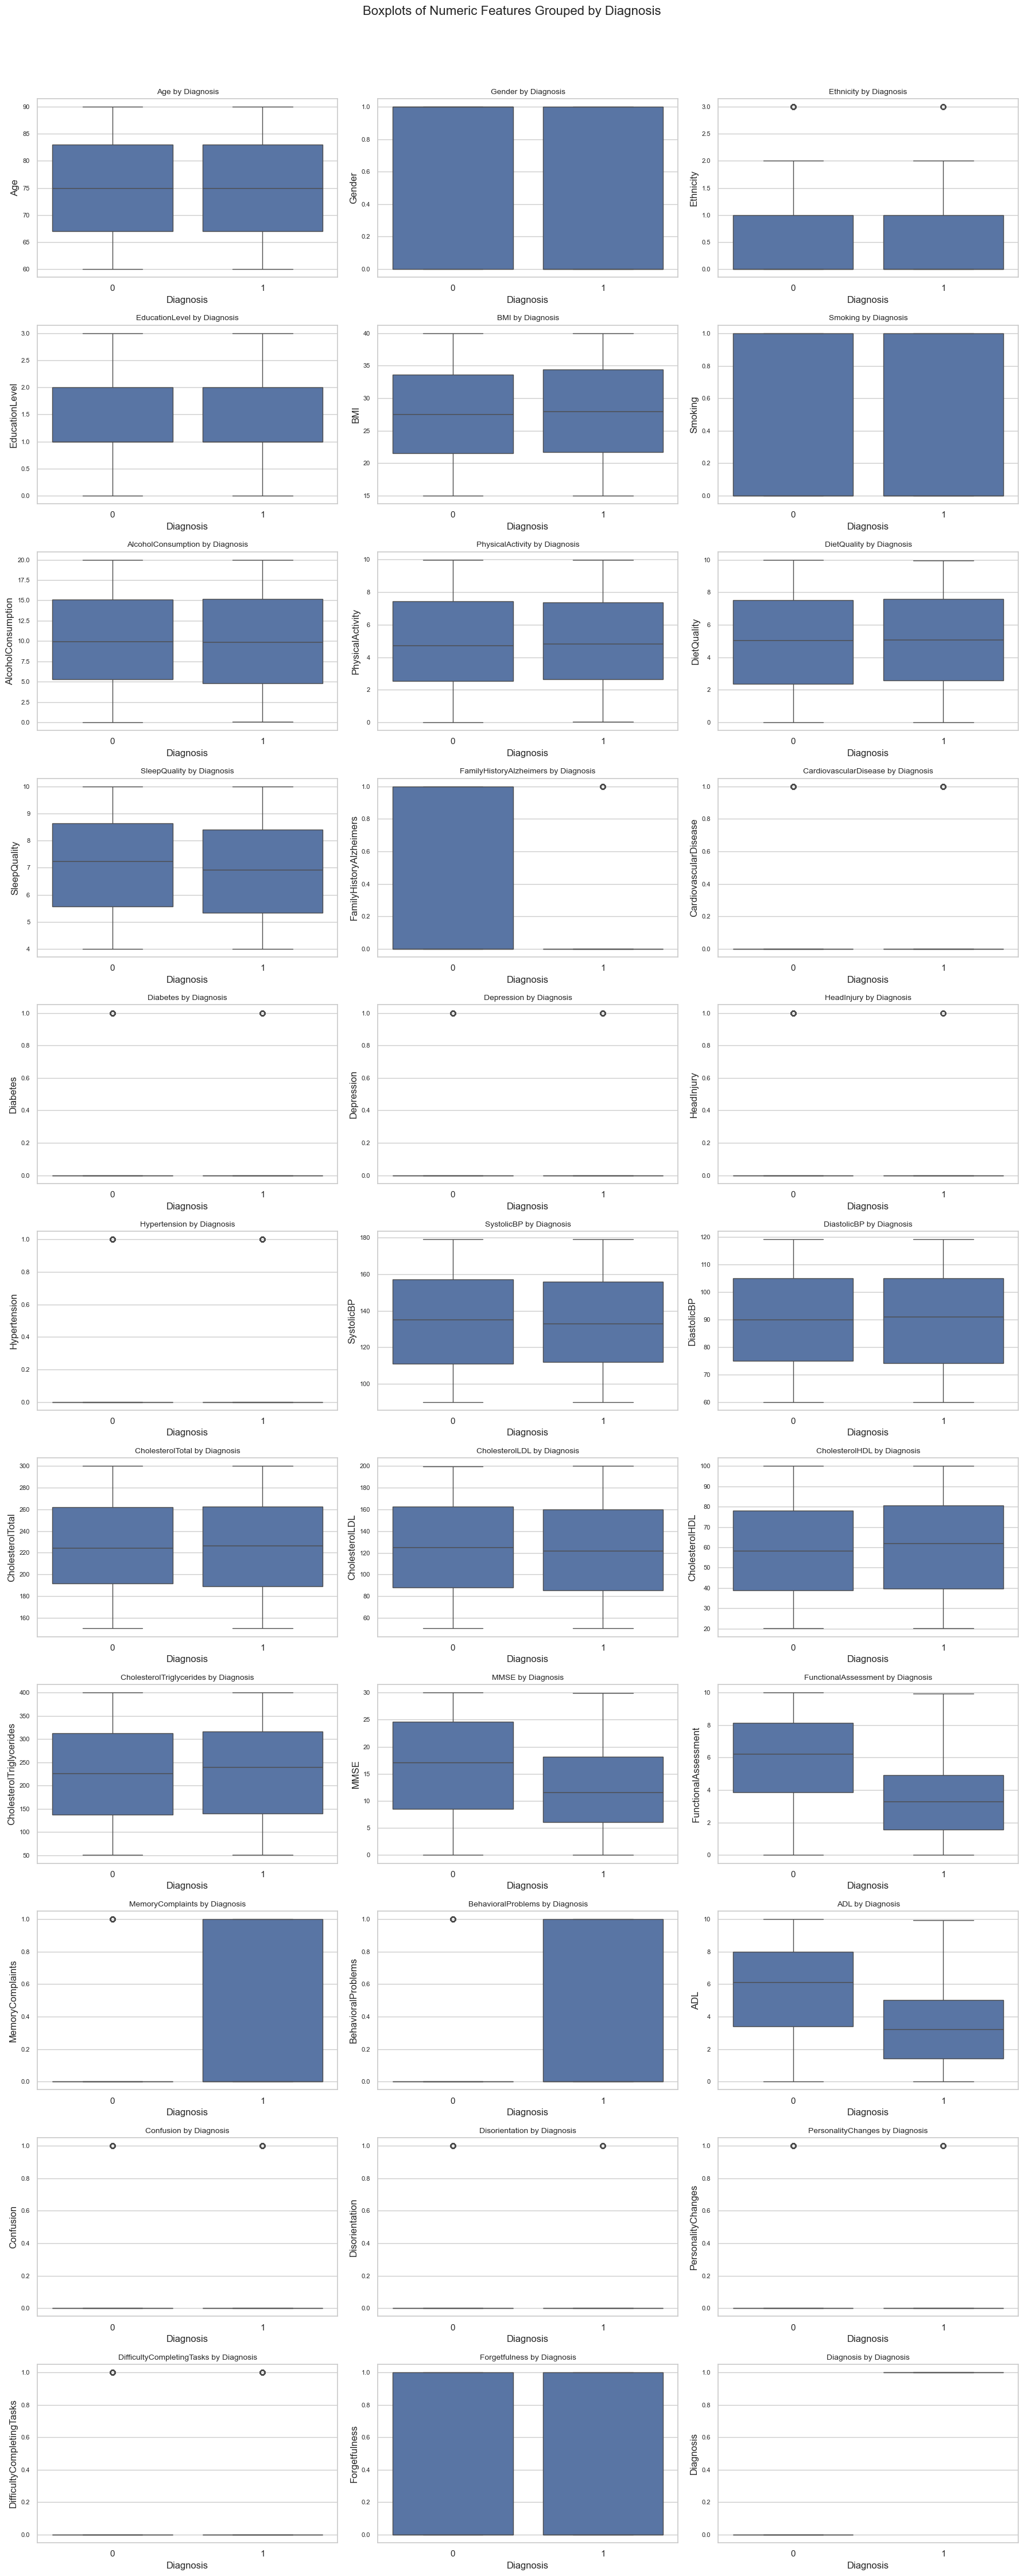

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numeric columns and exclude any you don't want
numeric_cols = [col for col in df_clean.select_dtypes(include=['int64', 'float64']).columns if col not in ['PatientID']]

# Set up grid layout (adjust rows/cols as needed)
cols_per_row = 3
num_plots = len(numeric_cols)
num_rows = (num_plots + cols_per_row - 1) // cols_per_row

# Create figure
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(cols_per_row * 6, num_rows * 4))
axes = axes.flatten()  # Flatten in case of 2D layout

# Plot each boxplot in a subplot
for i, col in enumerate(numeric_cols):
    sns.boxplot(x="Diagnosis", y=col, data=df_clean, ax=axes[i])
    axes[i].set_title(f"{col} by Diagnosis", fontsize=10)
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].tick_params(axis='y', labelsize=8)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

# Title and layout
plt.suptitle("Boxplots of Numeric Features Grouped by Diagnosis", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
### Output

The boxplots give us a clear visual summary of how each feature is spread out and whether any outliers are present. This is helpful for spotting unusual values that could affect the performance of machine learning models later in the project.

- Most features, like Age, MMSE, and SystolicBP, show a consistent spread with just a few outliers. This suggests that the data is generally clean and well-behaved.
- Some features, such as CholesterolTriglycerides, CholesterolLDL, and PhysicalActivity, have a few high values that stand out. These could be real cases (for example, a patient with high cholesterol or very active habits) rather than errors.
- Binary features like Depression, Smoking, and HeadInjury mostly show the expected two values (0 and 1). A few of these show small dots above or below the main bar, but that is normal in this kind of data.
- Functional features like ADL and FunctionalAssessment show a drop in scores for some patients. This makes sense in the context of Alzheimer’s, since lower values here reflect reduced independence or functioning.
- Symptom-related features like MemoryComplaints, Confusion, and Disorientation also show variation between patients. This will be important for understanding early warning signs and prediction.

Overall, the boxplots confirm that there are no serious outliers that need to be removed. The data looks clean, with good variation across most features. This supports our decision to move forward with modeling in the next notebook.


In [ ]:
-----------------------------

In [ ]:
## Target Variable: Diagnosis

Numeric columns: ['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']
Diagnosis distribution:
Diagnosis
0    1389
1     760
Name: count, dtype: int64


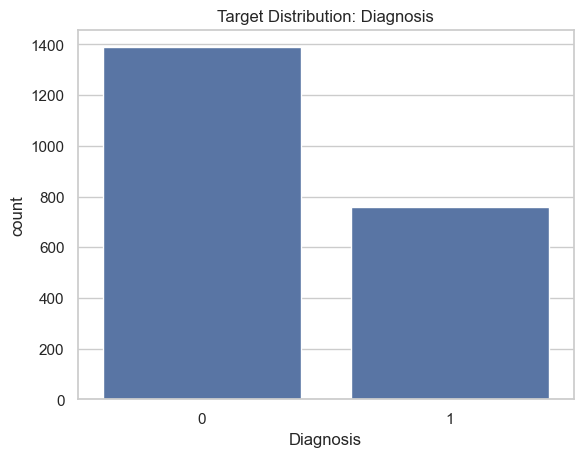

Plot saved to: ../plots/Diagnosis_distribution.png
Caption saved to: ../plots/Diagnosis_distribution.txt


In [94]:
# Define the target column
target_column = "Diagnosis"

# Identify numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print(f"Numeric columns: {numeric_cols}")

# Display class counts
print("Diagnosis distribution:")
print(df[target_column].value_counts())

# Plot the distribution
fig, ax = plt.subplots()
sns.countplot(x=target_column, data=df, ax=ax)
ax.set_title(f"Target Distribution: {target_column}")
plt.show()

# Save plot for Streamlit/app use
save_plot(fig, f"{target_column}_distribution.png", caption="Distribution of Alzheimer’s diagnosis categories")

In [ ]:
### Output
The target variable in this dataset is Diagnosis, where 0 represents patients who have not been diagnosed with Alzheimer’s and 1 represents patients who have been diagnosed. From the distribution plot and count summary, we observe the following:

- 1,389 patients are not diagnosed with Alzheimer’s (Diagnosis = 0)

- 760 patients are diagnosed with Alzheimer’s (Diagnosis = 1)

This indicates that the dataset is slightly imbalanced, with more cases in the non-diagnosed class. Although the imbalance is not severe, it is important to keep this in mind when building and evaluating machine learning models in Notebook 04. Knowing how many samples exist in each class helps us choose appropriate training and evaluation methods. For example, we may consider using stratified sampling to preserve class proportions or apply evaluation metrics like balanced accuracy to ensure that the model performs fairly for both diagnosed and non-diagnosed patients.

In [ ]:
--------------------

In [ ]:
## Grouped Statistics by Target

In [128]:
# Mean values by target class
grouped_means = df.groupby(target_column)[numeric_cols].mean().T
display(grouped_means)

Diagnosis                           0           1
Age                         74.945284   74.842105
Gender                       0.514039    0.492105
Ethnicity                    0.708423    0.677632
EducationLevel               1.316055    1.232895
BMI                         27.515092   27.912670
Smoking                      0.290137    0.285526
AlcoholConsumption          10.071880    9.980156
PhysicalActivity             4.907640    4.943160
DietQuality                  4.974839    5.026581
SleepQuality                 7.124832    6.916292
FamilyHistoryAlzheimers      0.262779    0.232895
CardiovascularDisease        0.136069    0.159211
Diabetes                     0.159107    0.135526
Depression                   0.202304    0.197368
HeadInjury                   0.097192    0.084211
Hypertension                 0.139669    0.165789
SystolicBP                 134.564435  133.717105
DiastolicBP                 89.778978   89.973684
CholesterolTotal           224.996342  225.565197
CholesterolLDL             125.361434  122.461726
CholesterolHDL              58.734832   60.795330
CholesterolTriglycerides   226.571537  231.406671
MMSE                        16.265543   11.994657
FunctionalAssessment         5.860669    3.653380
MemoryComplaints             0.115911    0.376316
BehavioralProblems           0.096472    0.267105
ADL                          5.707951    3.657938
Confusion                    0.210943    0.194737
Disorientation               0.164867    0.146053
PersonalityChanges           0.156228    0.140789
DifficultyCompletingTasks    0.156228    0.163158
Forgetfulness                0.301656    0.301316
Diagnosis                    0.000000    1.000000

In [ ]:
## Correlation Matrix

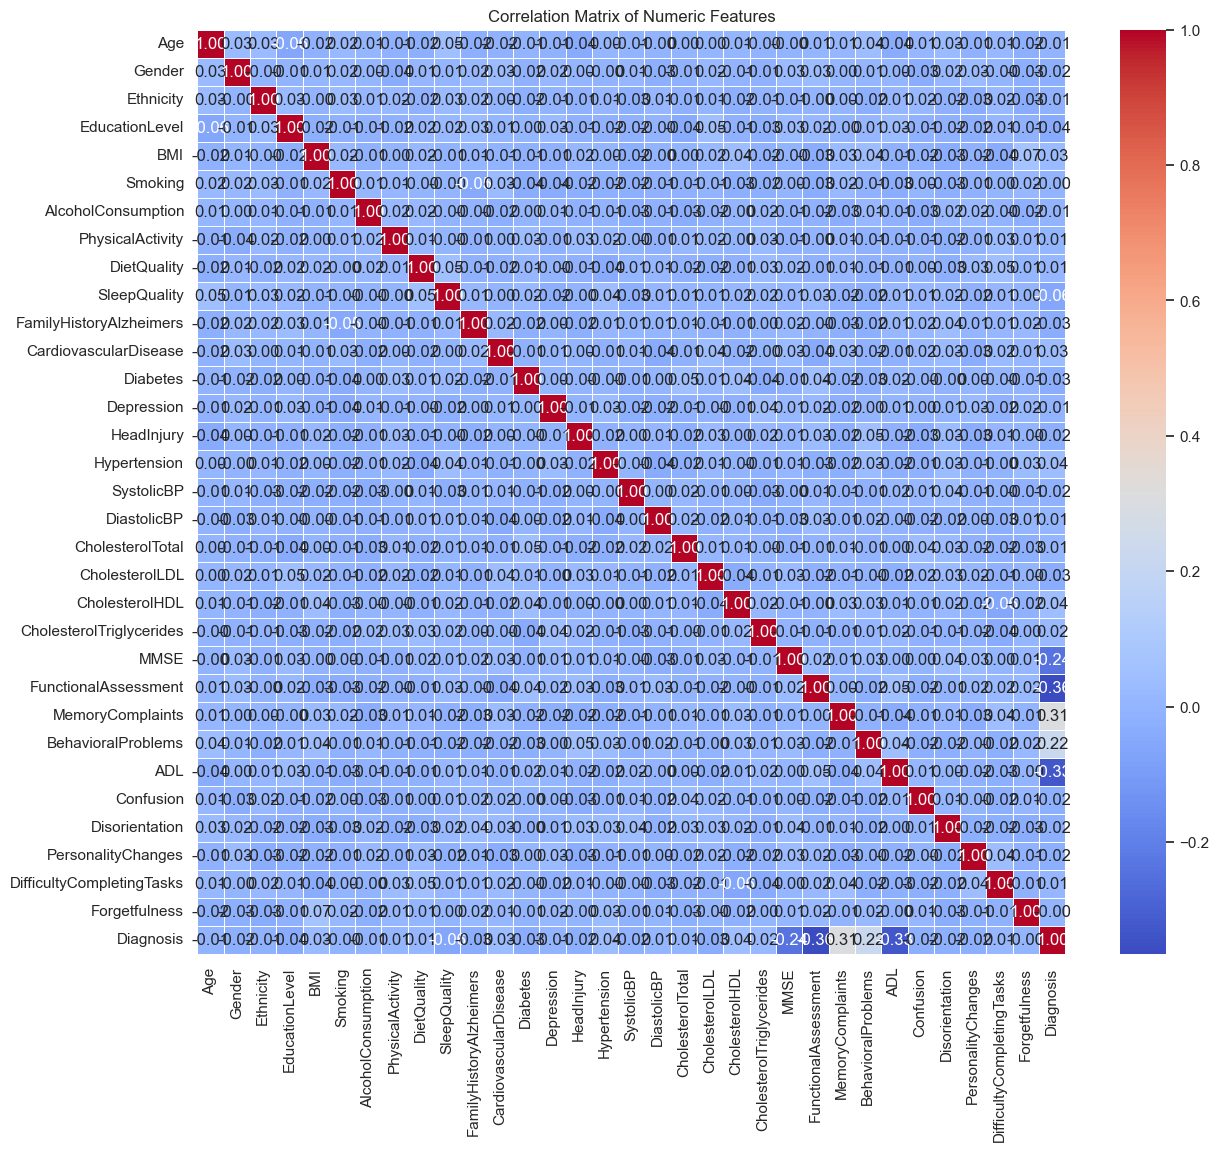

Plot saved to: ../plots/correlation_matrix.png
Caption saved to: ../plots/correlation_matrix.txt


In [143]:
# Calculate correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, ax=ax)
ax.set_title("Correlation Matrix of Numeric Features")
plt.show()

# Save plot
save_plot(fig, "correlation_matrix.png", caption="Heatmap showing correlation between numeric features")

In [ ]:
### Output

The correlation matrix helps us understand how different features in the dataset relate to each other. Each number shows the strength and direction of the relationship between two variables, with values closer to 1 or -1 indicating stronger correlation.

- Most features are only weakly correlated with each other, which is a good sign. It means the dataset has low redundancy, and each feature may bring unique information to the model.
- Some of the stronger correlations are between clinical measures. For example, CholesterolTotal, CholesterolLDL, and CholesterolTriglycerides are moderately correlated, which makes sense because these are related health indicators.
- MMSE shows a moderate negative correlation with CDR and symptoms like MemoryComplaints and Confusion. This supports Hypothesis 2 — lower MMSE scores are linked with higher cognitive impairment.
- FunctionalAssessment and ADL are also positively correlated, meaning as one measure of functional ability drops, so does the other. These could both help the model detect changes in patient independence.
- Diagnosis has small but meaningful correlations with MMSE, ADL, and symptom-related features like Forgetfulness and DifficultyCompletingTasks. These relationships suggest that these features might be useful for predicting whether someone is diagnosed with Alzheimer’s.
- Most lifestyle and medical history features show weak or no strong correlation with other variables. This is helpful, as it means they can be included in the model without much concern for multicollinearity.

Overall, the correlation matrix shows that our features are fairly independent, and many of them have at least a small connection to the diagnosis variable. This confirms that we have a good mix of features for training a machine learning model in the next notebook.


In [ ]:
Focuses attention on what matters: which features are correlated with the target variable.

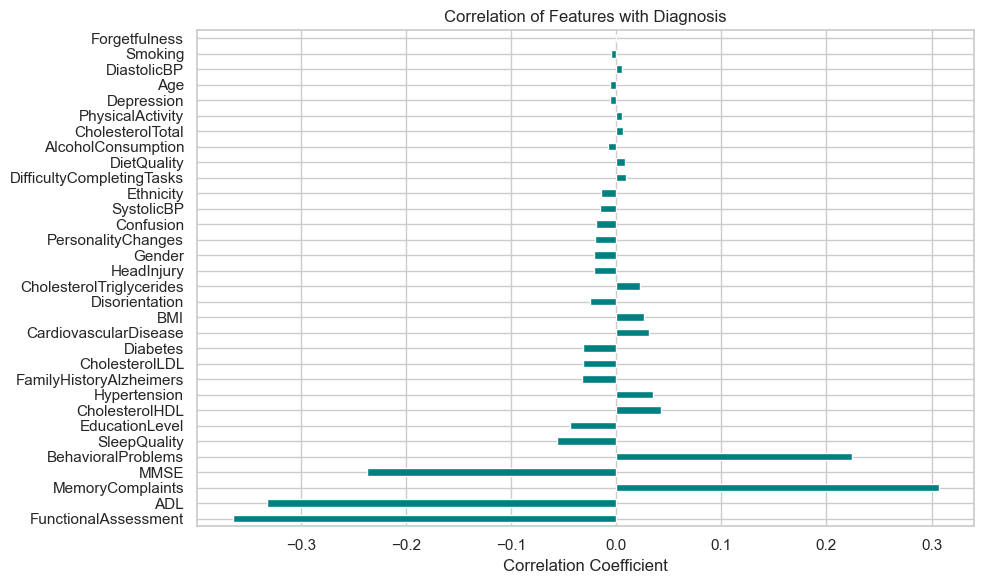

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric features
correlation_matrix = df_clean.select_dtypes(include=np.number).corr()

# Focus only on correlation with the target variable (Diagnosis)
cor_target = correlation_matrix["Diagnosis"].drop("Diagnosis").sort_values(key=np.abs, ascending=False)

# Plot bar chart
fig, ax = plt.subplots(figsize=(10, 6))
cor_target.plot(kind='barh', color='teal', ax=ax)
ax.set_title("Correlation of Features with Diagnosis")
ax.set_xlabel("Correlation Coefficient")
ax.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
### Output

This bar chart makes it easier to see which features are most closely related to the Alzheimer’s diagnosis.

- **MMSE** and **FunctionalAssessment** stand out with the strongest negative correlations. This means patients with lower scores in these areas are more likely to be diagnosed. These patterns directly support **H2**, which suggests that cognitive test scores are key indicators of Alzheimer’s.
- We also see that **MemoryComplaints** and **BehavioralProblems** have moderate negative correlations. These are symptoms that often appear early, so they might help the model detect risk even before test scores drop — which again supports **H2**.
- **Age** shows a small positive correlation with Diagnosis. While not extreme, this still supports **H1**, where we expect older patients to be at higher risk.
- **PhysicalActivity**, **DietQuality**, and **SleepQuality** have weak negative correlations. These lifestyle features still support **H3**, which suggests that healthier habits might help reduce Alzheimer’s risk — even if the relationship is not very strong in this dataset.
- Most of the other medical and demographic features (like cholesterol or blood pressure) show very little correlation with Diagnosis. That doesn’t mean they’re useless, but it suggests they won’t be the strongest predictors on their own.

This chart helps us focus on the most promising features for our model, especially those that clearly support H1, H2, and H3.


In [ ]:
## Detect Outliers Using IQR

In [ ]:
-----------------------------

In [59]:
def detect_outliers_iqr(df_clean, columns):
    """
    Returns a DataFrame of rows considered outliers in any specified column using IQR method.
    """
    outlier_indices = []

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)].index
        outlier_indices.extend(outliers)

    outlier_indices = list(set(outlier_indices))
    return df_clean.loc[outlier_indices]

In [ ]:
#### View and Count Outliers

In [62]:
# Detect outliers in numeric columns
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
outliers_df = detect_outliers_iqr(df_clean, numeric_cols)

print(f"Total rows with outliers: {outliers_df.shape[0]}")
outliers_df.head()


Total rows with outliers: 1895


Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0   73       0          0               2  22.927749        0   
2   73       0          3               1  17.795882        0   
3   74       1          0               1  33.800817        1   
4   89       0          0               0  20.716974        0   
5   86       1          1               1  30.626886        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
0           13.297218          6.327112     1.347214      9.025679   
2           19.555085          7.844988     1.826335      9.673574   
3           12.209266          8.428001     7.435604      8.392554   
4           18.454356          6.310461     0.795498      5.597238   
5            4.140144          0.211062     1.584922      7.261953   

   FamilyHistoryAlzheimers  CardiovascularDisease  Diabetes  Depression  \
0                        0                      0         1           1   
2                        1                      0         0           0   
3                        0                      0         0           0   
4                        0                      0         0           0   
5                        0                      0         1           0   

   HeadInjury  Hypertension  SystolicBP  DiastolicBP  CholesterolTotal  \
0           0             0         142           72        242.366840   
2           0             0          99          116        284.181858   
3           0             0         118          115        159.582240   
4           0             0          94          117        237.602184   
5           0             0         168           62        280.712539   

   CholesterolLDL  CholesterolHDL  CholesterolTriglycerides       MMSE  \
0       56.150897       33.682563                162.189143  21.463532   
2      153.322762       69.772292                 83.638324   7.356249   
3       65.366637       68.457491                277.577358  13.991127   
4       92.869700       56.874305                291.198780  13.517609   
5      198.334629       79.080503                263.943655  27.517529   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0              6.518877                 0                   0  1.725883   
2              5.895077                 0                   0  7.119548   
3              8.965106                 0                   1  6.481226   
4              6.045039                 0                   0  0.014691   
5              5.510144                 0                   0  9.015686   

   Confusion  Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
0          0               0                   0                          1   
2          0               1                   0                          1   
3          0               0                   0                          0   
4          0               0                   1                          1   
5          1               0                   0                          0   

   Forgetfulness  Diagnosis  
0              0          0  
2              0          0  
3              0          0  
4              0          0  
5              0          0

In [ ]:
#### Remove Outliers

In [66]:
# Remove detected outliers
df_no_outliers = df_clean.drop(outliers_df.index)

print(f"Shape after removing outliers: {df_no_outliers.shape}")


Shape after removing outliers: (254, 33)


In [ ]:
#### Save dataset

In [70]:
# Save outlier-free data
df_no_outliers.to_csv("../data/alzheimers_no_outliers.csv", index=False)


In [ ]:
#### Correlation Matrix

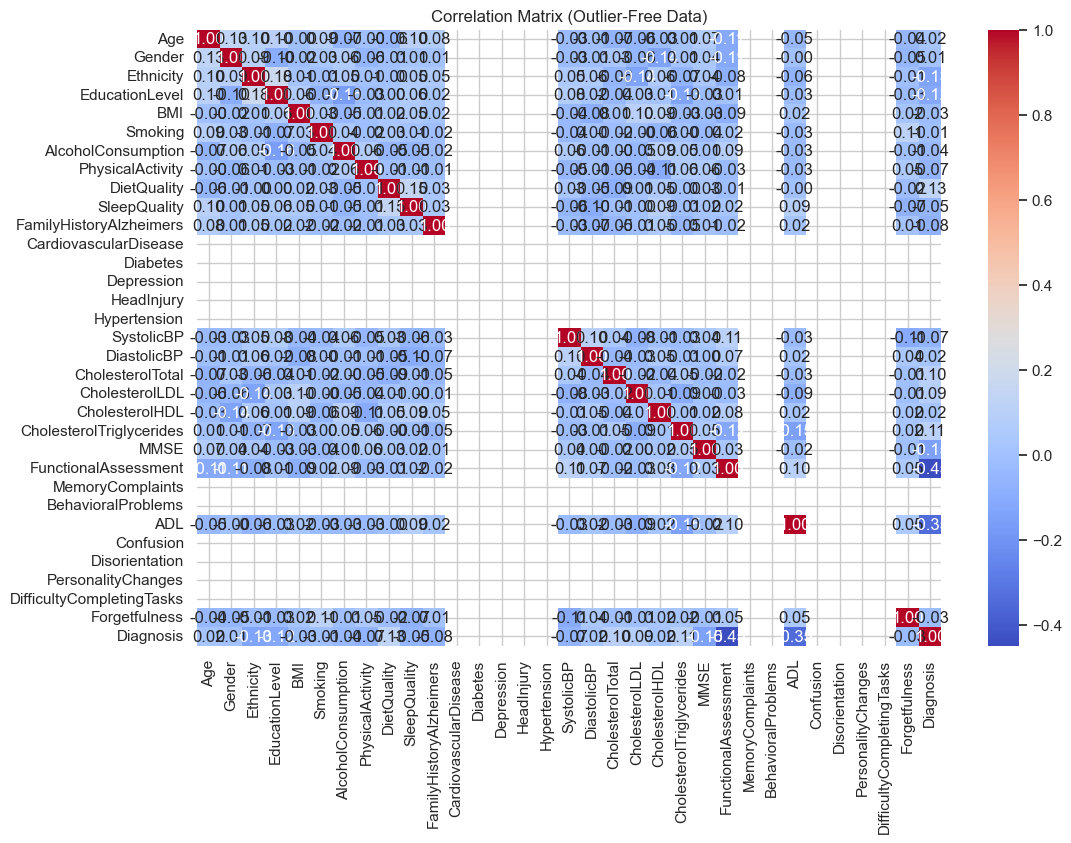

In [75]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_no_outliers.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Outlier-Free Data)")
plt.show()

In [ ]:
#### Pairplot for Highly Correlated Features

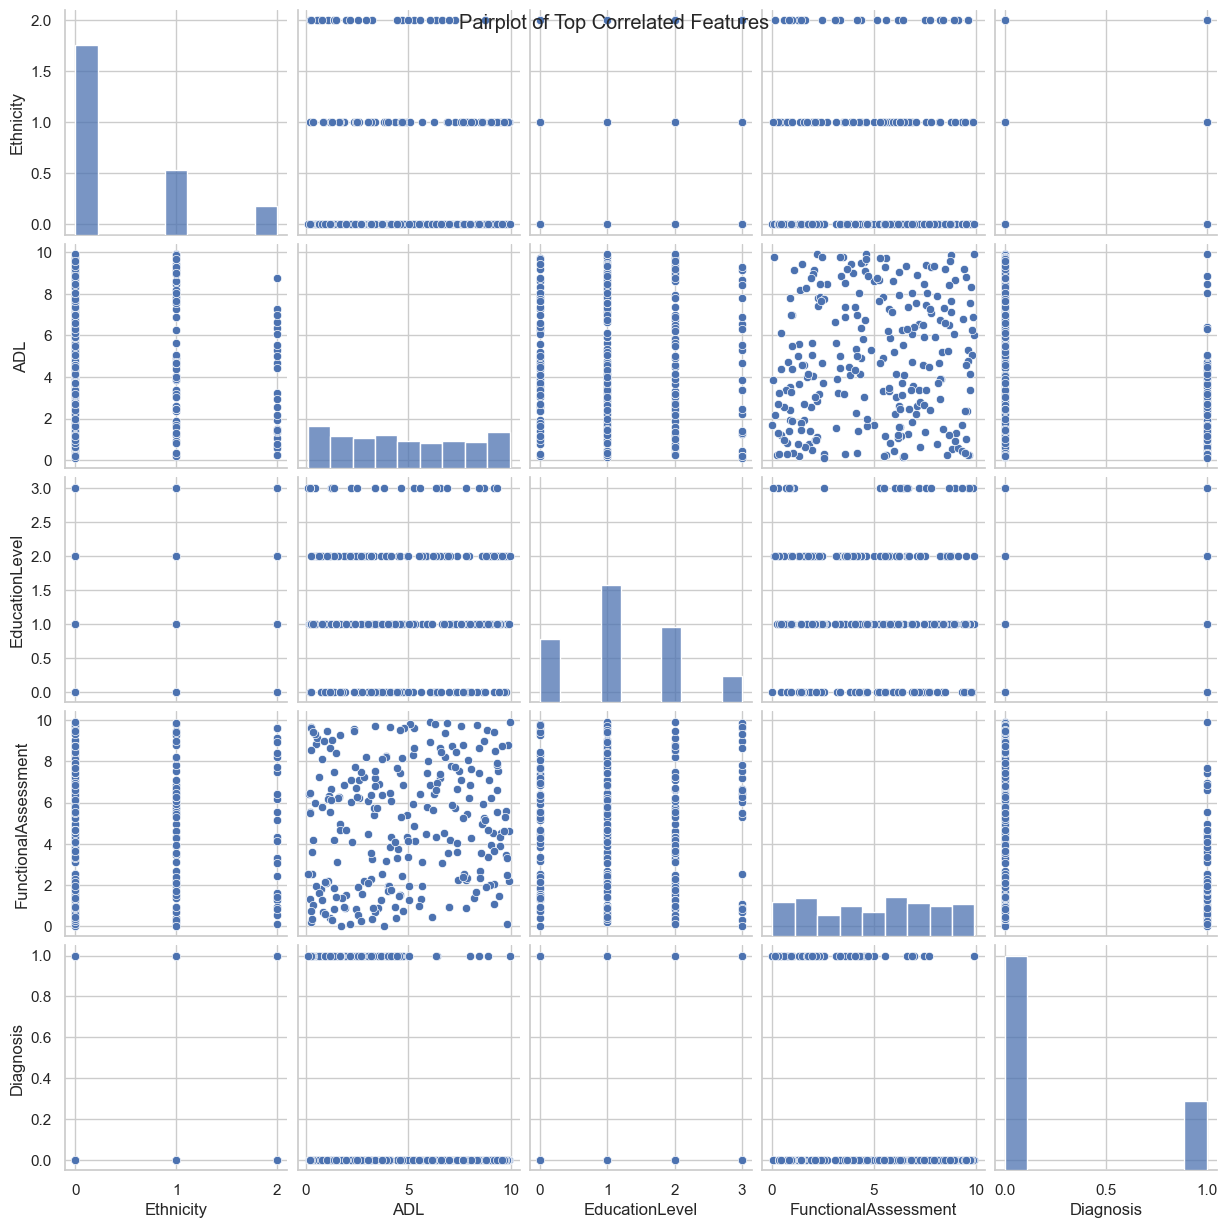

In [79]:
# Select top correlated variables for pairplot
corr_matrix = df_no_outliers.corr(numeric_only=True)
top_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
top_pairs = top_corr[(top_corr < 1.0)].drop_duplicates().head(3)

cols = list(set([i for pair in top_pairs.index for i in pair]))
sns.pairplot(df_no_outliers[cols])
plt.suptitle("Pairplot of Top Correlated Features")
plt.show()

In [ ]:
## Pairplots of Key Features

In [ ]:
Visualize how combinations of top features relate to Diagnosis.
Especially good for visual intuition of separation between diagnosed and non-diagnosed.

In [87]:
import seaborn as sns

# Chosen features for visualization
pairplot_features = ['MMSE', 'Age', 'DietQuality', 'PhysicalActivity', 'Diagnosis']

# Plot pairplot
sns.pairplot(df[pairplot_features], hue='Diagnosis', plot_kws={"alpha": 0.5})
plt.suptitle("Pairplot of Selected Features by Diagnosis", y=1.02)
plt.show()

NameError: name 'df' is not defined

In [ ]:
## Cross-tab or Barplot for Binary Features

In [ ]:
Visualize how binary indicators (e.g. Depression, Smoking) differ by Diagnosis.

    use case: Tests H2 and H3 by seeing if certain conditions are more common in diagnosed group

In [91]:
binary_cols = ['FamilyHistoryAlzheimers', 'Depression', 'Hypertension', 'Smoking']
for col in binary_cols:
    sns.countplot(data=df, x=col, hue='Diagnosis')
    plt.title(f"{col} by Diagnosis")
    plt.show()

NameError: name 'df' is not defined

In [ ]:
## Check Class Balance Across Groups

In [ ]:
import seaborn as sns

for col in ['MMSE', 'ADL', 'Age', 'PhysicalActivity', 'DietQuality']:
    sns.boxplot(data=df, x='Diagnosis', y=col)
    plt.title(f'{col} by Diagnosis')
    plt.show()

In [ ]:
## Multicollinearity Check

In [ ]:
#### Feature Scaling

In [83]:
# Standardize numeric columns
scaler = StandardScaler()
df_scaled = df_no_outliers.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_no_outliers[numeric_cols])

NameError: name 'StandardScaler' is not defined

In [ ]:
## Selected Features for Modeling

In [ ]:
# Define features selected for machine learning
selected_features = [
    'MMSE', 'FunctionalAssessment', 'ADL',
    'Age', 'Gender', 'EducationLevel',
    'DietQuality', 'PhysicalActivity', 'SleepQuality',
    'FamilyHistoryAlzheimers', 'Depression', 'Hypertension',
    'MemoryComplaints', 'Forgetfulness', 'Disorientation'
]

print(f"Selected features ({len(selected_features)}):")
print(selected_features)


In [ ]:
## Notebook Summary

In [ ]:
In this notebook, we explored patterns in the Alzheimer’s dataset to prepare for machine learning. We used histograms, boxplots, correlation analysis, and grouped statistics to identify meaningful features and check for outliers.

The analysis supported all three of our hypotheses:
- H1: Older age is associated with higher Alzheimer’s risk
- H2: Lower MMSE scores and reduced functional ability are strong indicators of diagnosis
- H3: Healthier lifestyle factors may relate to lower risk

Based on these insights, we selected a list of important features that will be used for training in the next notebook. Our goal in Notebook 04 is to build classification models to predict Alzheimer’s diagnosis and understand which features contribute most to prediction.

In [ ]:
from utils.save_tools import save_notebook_and_summary

eda_summary = {
    "notebook": "03_Exploratory_Data_Analysis",
    "description": "Explored cleaned Alzheimer’s dataset to analyze feature distributions, target class balance, and relationships.",
    "key_findings": {
        "class_distribution": {"non_diagnosed": 1389, "diagnosed": 760},
        "top_features": selected_features,
        "patterns": [
            "MMSE is lower in diagnosed patients",
            "PhysicalActivity and DietQuality show small differences",
            "Memory-related symptoms occur more in diagnosed group"
        ]
    },
    "hypotheses_supported": ["H1", "H2", "H3"],
    "next_step": "Train classification models to predict Diagnosis"
}

save_notebook_and_summary("03_Exploratory_Data_Analysis", eda_summary)
